In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Shopping Trends And Customer Behaviour Dataset.csv")

In [2]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df_new=df.drop(['Unnamed: 0','Customer ID'],axis=1)
df_new.isna().sum()

Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [4]:
unique_item=df_new['Item Purchased'].unique()
print(unique_item)

['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


In [5]:
unique_category=df_new['Category'].unique()
print(unique_category)

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [6]:
unique_location=df_new['Location'].unique()
print(unique_location)

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


In [7]:
unique_color=df_new['Color'].unique()
print(unique_color)

['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']


In [8]:
unique_season=df_new['Season'].unique()
print(unique_season)

['Winter' 'Spring' 'Summer' 'Fall']


In [9]:
unique_subcription=df_new['Subscription Status'].unique()
print(unique_subcription)

['Yes' 'No']


In [10]:
unique_shop=df_new['Shipping Type'].unique()
print(unique_shop)

['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']


In [11]:
unique_discount=df_new['Discount Applied'].unique()
print(unique_discount)

['Yes' 'No']


In [12]:
unique_promo=df_new['Promo Code Used'].unique()
print(unique_promo)

['Yes' 'No']


In [13]:
unique_payment=df_new['Payment Method'].unique()
print(unique_payment)

['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [14]:
unique_frequency=df_new['Frequency of Purchases'].unique()
print(unique_frequency)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [15]:
for col in ['Item Purchased', 'Location', 'Color']:
    print(f"欄位: {col}")
    print("總共有幾種類別:", df[col].nunique())
    print("出現次數前 5 名:\n", df[col].value_counts().head(), "\n")

欄位: Item Purchased
總共有幾種類別: 25
出現次數前 5 名:
 Item Purchased
Blouse     171
Pants      171
Jewelry    171
Shirt      169
Dress      166
Name: count, dtype: int64 

欄位: Location
總共有幾種類別: 50
出現次數前 5 名:
 Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64 

欄位: Color
總共有幾種類別: 25
出現次數前 5 名:
 Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64 



In [16]:
cat_cols = ['Item Purchased', 'Location', 'Color']
for col in cat_cols:
    freq_map = df_new[col].value_counts(normalize=True)  # 變成比例 (0~1)
    df_new[col + '_freq'] = df_new[col].map(freq_map)


In [17]:
df_new.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Item Purchased_freq,Location_freq,Color_freq
0,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0.043846,0.020256,0.040769
1,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0.042051,0.019744,0.040513
2,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0.031795,0.018462,0.040513
3,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0.041026,0.016154,0.040513
4,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0.043846,0.018974,0.037179


In [18]:
one_hot_cols = ['Shipping Type',  'Payment Method', 'Frequency of Purchases','Category','Season']

df_new = pd.get_dummies(df_new, columns=one_hot_cols, drop_first=False, dtype='uint8')


In [19]:
df_new.head()

,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Color,Review Rating,Subscription Status,Discount Applied,Promo Code Used,...,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,55,Male,Blouse,53,Kentucky,Gray,3.1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,0,0,1
1,19,Male,Sweater,64,Maine,Maroon,3.1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,0,0,1
2,50,Male,Jeans,73,Massachusetts,Maroon,3.1,Yes,Yes,Yes,...,0,1,0,1,0,0,0,1,0,0
3,21,Male,Sandals,90,Rhode Island,Maroon,3.5,Yes,Yes,Yes,...,0,1,0,0,1,0,0,1,0,0
4,45,Male,Blouse,49,Oregon,Turquoise,2.7,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0


In [20]:
label_cols = ['Subscription Status', 'Discount Applied', 'Promo Code Used']

for col in label_cols:
    df_new[col] = df_new[col].map({'Yes': 1, 'No': 0}).astype('Int64')


In [21]:
df_new['Gender'] = df_new['Gender'].map({'Male': 1, 'Female': 0}).astype('Int64')

In [22]:
df_new.head()

,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Color,Review Rating,Subscription Status,Discount Applied,Promo Code Used,...,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,55,1,Blouse,53,Kentucky,Gray,3.1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
1,19,1,Sweater,64,Maine,Maroon,3.1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
2,50,1,Jeans,73,Massachusetts,Maroon,3.1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,21,1,Sandals,90,Rhode Island,Maroon,3.5,1,1,1,...,0,1,0,0,1,0,0,1,0,0
4,45,1,Blouse,49,Oregon,Turquoise,2.7,1,1,1,...,0,0,0,1,0,0,0,1,0,0


In [23]:
print(df_new.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    3900 non-null   int64  
 1   Gender                                 3900 non-null   Int64  
 2   Item Purchased                         3900 non-null   object 
 3   Purchase Amount (USD)                  3900 non-null   int64  
 4   Location                               3900 non-null   object 
 5   Color                                  3900 non-null   object 
 6   Review Rating                          3900 non-null   float64
 7   Subscription Status                    3900 non-null   Int64  
 8   Discount Applied                       3900 non-null   Int64  
 9   Promo Code Used                        3900 non-null   Int64  
 10  Previous Purchases                     3900 non-null   int64  
 11  Item

In [24]:
df_calculate = df_new.drop(['Item Purchased', 'Location', 'Color'], axis=1)

In [25]:
pd.set_option('display.max_columns', None)  # 顯示所有欄位
pd.set_option('display.width', None)        # 不換行
df_calculate.head()


,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Item Purchased_freq,Location_freq,Color_freq,Shipping Type_2-Day Shipping,Shipping Type_Express,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,55,1,53,3.1,1,1,1,14,0.043846,0.020256,0.040769,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,19,1,64,3.1,1,1,1,2,0.042051,0.019744,0.040513,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,50,1,73,3.1,1,1,1,23,0.031795,0.018462,0.040513,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,21,1,90,3.5,1,1,1,49,0.041026,0.016154,0.040513,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,45,1,49,2.7,1,1,1,31,0.043846,0.018974,0.037179,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [26]:
#客戶評分與變數之相關係數
corr_rating = df_calculate.corrwith(df_calculate['Review Rating'],method='pearson',numeric_only=True).drop('Review Rating')

#是否訂閱會員與變數之相關係數
corr_sub = df_calculate.corrwith(df_calculate['Subscription Status'], method='pearson', numeric_only=True).drop('Subscription Status')


#購買頻率與變數之相關係數
# 順序編碼
freq_map_order = {
    'Annually':1,
    'Quarterly':2,
    'Every 3 Months':3,
    'Monthly':4,
    'Fortnightly':5, 
    'Bi-Weekly':6,
    'Weekly':7     
}

# 根據對應關係建立一個加權
df_calculate['freq_ord'] = sum(
    df_calculate[f'Frequency of Purchases_{k}'] * v
    for k, v in freq_map_order.items()
)

drop_freq_onehot = [c for c in df_calculate.columns if c.startswith('Frequency of Purchases_')]
df_calculate=df_calculate.drop(columns=drop_freq_onehot)

corr_spearman = df_calculate.corrwith(df_calculate['freq_ord'], method='spearman',numeric_only=True).drop('freq_ord')

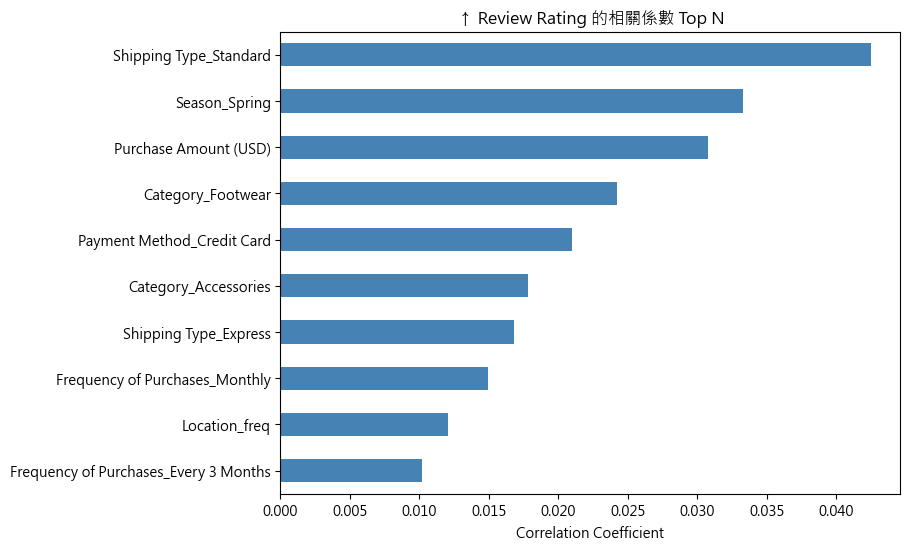

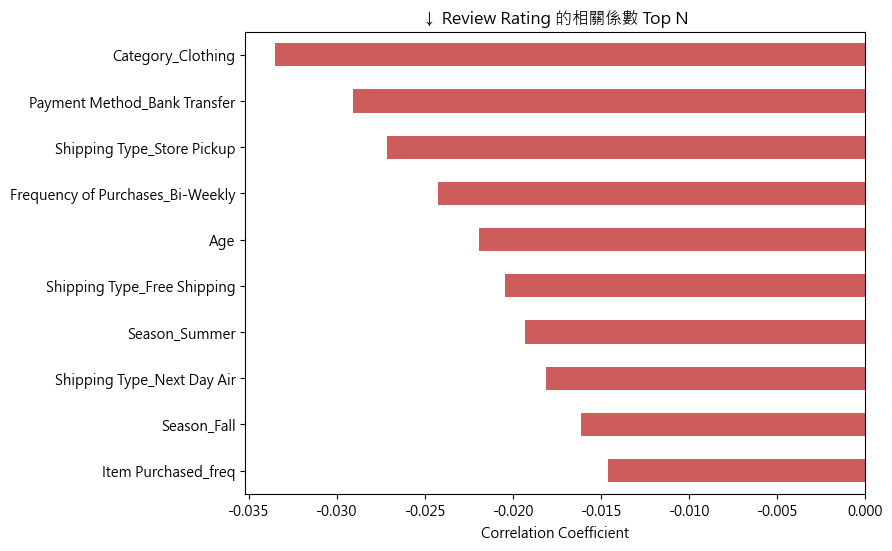

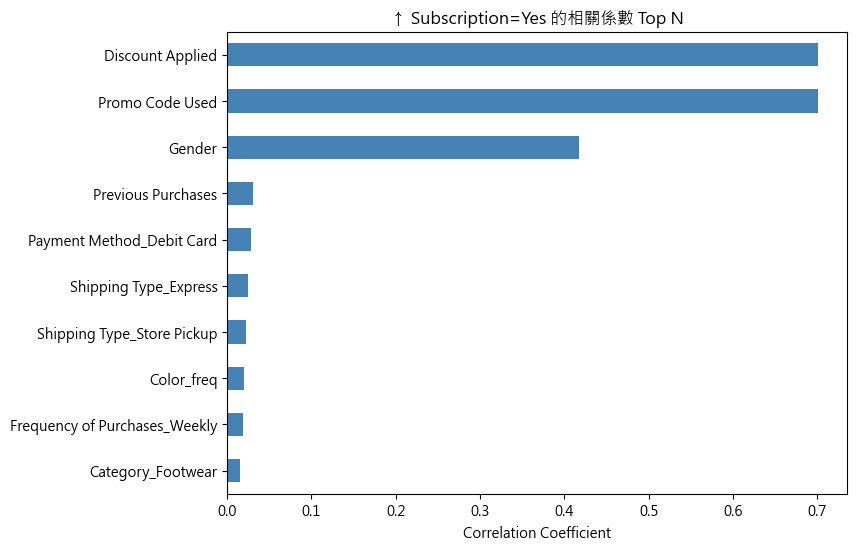

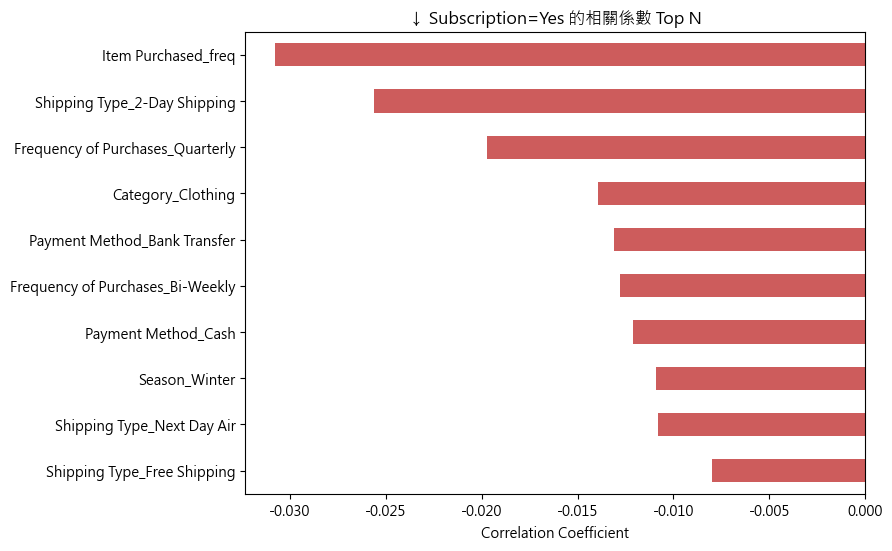

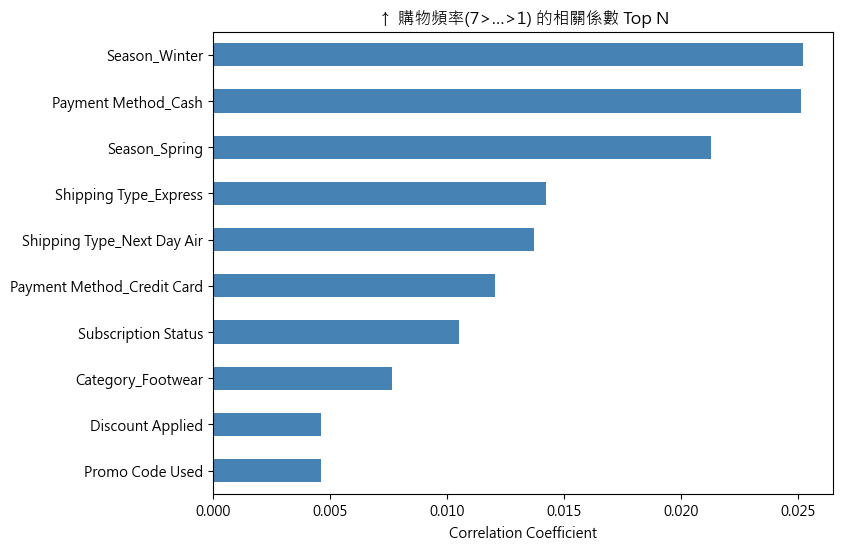

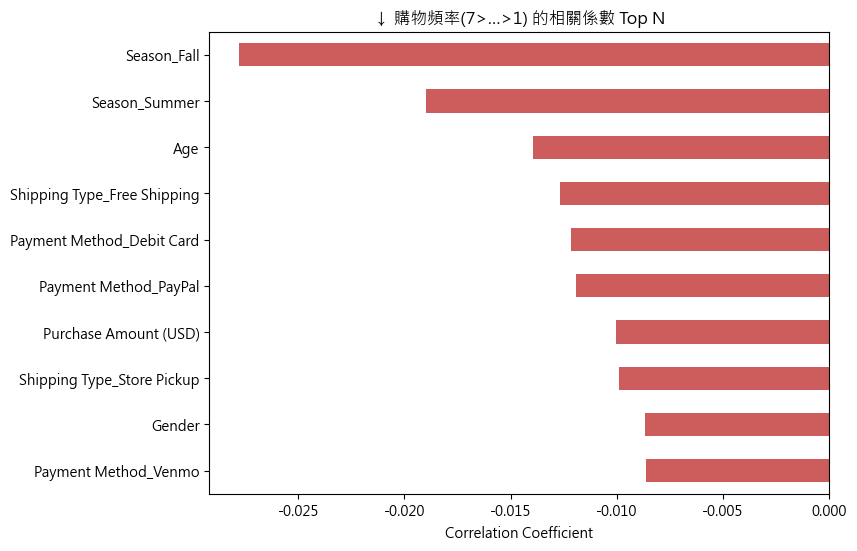

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'Microsoft YaHei', 'SimHei', 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 正常顯示負號


def plot_top_corr(corr_series, title, N=10, positive=True):
    """
    繪製相關係數直條圖
    corr_series: pd.Series, 各特徵與目標的相關值
    title: 圖表標題
    N: 前幾個
    positive: True=取正相關TopN, False=取負相關TopN
    """
    if positive:
        s = corr_series.sort_values(ascending=False).head(N)
        color = "steelblue"
    else:
        s = corr_series.sort_values(ascending=True).head(N)
        color = "indianred"
    
    plt.figure(figsize=(8,6))
    s.plot(kind='barh', color=color)
    plt.title(title)
    plt.xlabel("Correlation Coefficient")
    plt.gca().invert_yaxis()
    plt.show()


# 1. 顧客評分
plot_top_corr(corr_rating, "↑ Review Rating 的相關係數 Top N", positive=True)
plot_top_corr(corr_rating, "↓ Review Rating 的相關係數 Top N", positive=False)

# 2. 是否訂閱會員
plot_top_corr(corr_sub, "↑ Subscription=Yes 的相關係數 Top N", positive=True)
plot_top_corr(corr_sub, "↓ Subscription=Yes 的相關係數 Top N", positive=False)

# 3. 回購頻率
plot_top_corr(corr_spearman, "↑ 購物頻率(7>…>1) 的相關係數 Top N", positive=True)
plot_top_corr(corr_spearman, "↓ 購物頻率(7>…>1) 的相關係數 Top N", positive=False)



In [28]:
df_eda=df.drop(['Unnamed: 0','Customer ID'],axis=1)
df_eda.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [29]:
df_eda['Purchase Amount (USD)'].quantile([0.33, 0.66])

0.33    45.0
0.66    73.0
Name: Purchase Amount (USD), dtype: float64

In [30]:
df_eda['Purchase Amount (USD)'].max()

100

In [31]:
amount_bins=[0,45,73,100]
amount_labels=["低消費","中消費","高消費"]
df_eda["AmountGroup"] = pd.cut(df_eda["Purchase Amount (USD)"], bins=amount_bins,
                           labels=amount_labels, right=True, include_lowest=True)


In [32]:
df_eda.groupby("Shipping Type")["Review Rating"].mean()

Shipping Type
2-Day Shipping    3.761085
Express           3.776935
Free Shipping     3.717926
Next Day Air      3.720833
Standard          3.817737
Store Pickup      3.706462
Name: Review Rating, dtype: float64

In [33]:
df_eda.groupby("Shipping Type")["Review Rating"].std()

Shipping Type
2-Day Shipping    0.707886
Express           0.709915
Free Shipping     0.707498
Next Day Air      0.732919
Standard          0.699063
Store Pickup      0.735699
Name: Review Rating, dtype: float64

In [34]:
df_eda.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

In [35]:
df_eda.groupby("Season")["Review Rating"].std()

Season
Fall      0.711944
Spring    0.725551
Summer    0.715493
Winter    0.710774
Name: Review Rating, dtype: float64

In [36]:
df_eda.groupby("AmountGroup")["Review Rating"].mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_22752\2952169993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby("AmountGroup")["Review Rating"].mean()


AmountGroup
低消費    3.725308
中消費    3.748503
高消費    3.776099
Name: Review Rating, dtype: float64

In [37]:
df_eda.groupby("AmountGroup")["Review Rating"].std()

C:\Users\USER\AppData\Local\Temp\ipykernel_22752\4130547264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby("AmountGroup")["Review Rating"].std()


AmountGroup
低消費    0.706604
中消費    0.721448
高消費    0.720168
Name: Review Rating, dtype: float64

In [38]:
#對shipping type進行單因子ANOVA檢定
import scipy.stats as stats
groups_shipping = [df_eda.loc[df_eda["Shipping Type"] == st, "Review Rating"] 
          for st in df_eda["Shipping Type"].unique()]
f_stat, p_value = stats.f_oneway(*groups_shipping)
print("F統計量:", f_stat)
print("p值:", p_value)


F統計量: 2.3528191317009477
p值: 0.03836536703450973


In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 建立 Tukey 檢定
tukey_shipping = pairwise_tukeyhsd(
    endog=df_eda["Review Rating"],       # 依變數
    groups=df_eda["Shipping Type"],      # 分組變數
    alpha=0.05                           # 顯著水準
)

print(tukey_shipping)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower  upper  reject
------------------------------------------------------------------
2-Day Shipping       Express   0.0159 0.9988 -0.0985 0.1302  False
2-Day Shipping Free Shipping  -0.0432 0.8866 -0.1563   0.07  False
2-Day Shipping  Next Day Air  -0.0403 0.9167 -0.1545  0.074  False
2-Day Shipping      Standard   0.0567 0.7171 -0.0574 0.1707  False
2-Day Shipping  Store Pickup  -0.0546 0.7489 -0.1688 0.0596  False
       Express Free Shipping   -0.059 0.6655 -0.1713 0.0533  False
       Express  Next Day Air  -0.0561  0.721 -0.1695 0.0573  False
       Express      Standard   0.0408 0.9087 -0.0724  0.154  False
       Express  Store Pickup  -0.0705 0.4837 -0.1838 0.0429  False
 Free Shipping  Next Day Air   0.0029    1.0 -0.1093 0.1151  False
 Free Shipping      Standard   0.0998 0.1123 -0.0121 0.2118  False
 Free Shipping  Store Pickup  -0.0115 0.9997 -0.1236 0.1007  F

In [40]:
#對season 進行單因子ANOVA檢定
groups_season = [df_eda.loc[df_eda["Season"] == st, "Review Rating"] 
          for st in df_eda["Season"].unique()]
f_stat, p_value = stats.f_oneway(*groups_season)
print("F統計量:", f_stat)
print("p值:", p_value)

F統計量: 1.6957932205140427
p值: 0.16569808106402317


In [41]:
#對Purchase Amount (USD)進行單因子ANOVA檢定
groups_amount = [df_eda.loc[df_eda["AmountGroup"] == st, "Review Rating"] 
          for st in df_eda["AmountGroup"].unique()]
f_stat, p_value = stats.f_oneway(*groups_amount)
print("F統計量:", f_stat)
print("p值:", p_value)

F統計量: 1.6370388091161137
p值: 0.1946890687548693


In [42]:
df_eda.groupby("Category")["Review Rating"].mean()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64

In [43]:
df_eda.groupby("Category")["Review Rating"].std()

Category
Accessories    0.715317
Clothing       0.717671
Footwear       0.719843
Outerwear      0.702598
Name: Review Rating, dtype: float64

In [44]:
df_eda.groupby("Payment Method")["Review Rating"].mean()

Payment Method
Bank Transfer    3.701634
Cash             3.750448
Credit Card      3.782861
Debit Card       3.759748
PayPal           3.749631
Venmo            3.751735
Name: Review Rating, dtype: float64

In [45]:
df_eda.groupby("Payment Method")["Review Rating"].std()

Payment Method
Bank Transfer    0.713717
Cash             0.729083
Credit Card      0.723459
Debit Card       0.725345
PayPal           0.717813
Venmo            0.686064
Name: Review Rating, dtype: float64

In [46]:
#對商品類別進行單樣本ANOVA檢定
groups_category = [df_eda.loc[df_eda["Category"] == st, "Review Rating"] 
          for st in df_eda["Category"].unique()]
f_stat, p_value = stats.f_oneway(*groups_category)
print("F統計量:", f_stat)
print("p值:", p_value)

F統計量: 1.739946011114949
p值: 0.15657879668723304


In [47]:
#對付款方式進行單樣本ANOVA檢定
groups_payment = [df_eda.loc[df_eda["Payment Method"] == st, "Review Rating"] 
          for st in df_eda["Payment Method"].unique()]
f_stat, p_value = stats.f_oneway(*groups_payment)
print("F統計量:", f_stat)
print("p值:", p_value)

F統計量: 0.8649186292534294
p值: 0.5037905569911245


In [48]:
df_eda.groupby("Discount Applied")["Subscription Status"].value_counts()

Discount Applied  Subscription Status
No                No                     2223
Yes               Yes                    1053
                  No                      624
Name: count, dtype: int64

In [49]:
pd.crosstab(df_eda["Discount Applied"], 
            df_eda["Subscription Status"], 
            normalize="index") * 100


Subscription Status,No,Yes
Discount Applied,,
No,100.000000,0.000000
Yes,37.209302,62.790698


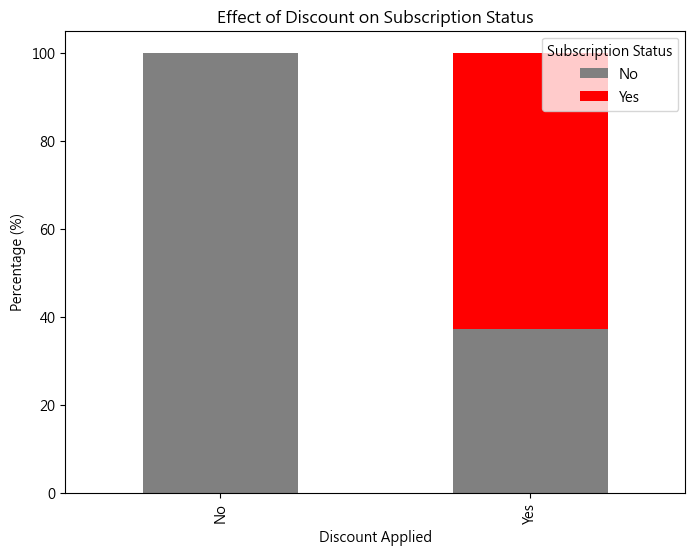

In [50]:
import matplotlib.pyplot as plt

ct_discount_100 = pd.crosstab(df_eda["Discount Applied"], 
                 df_eda["Subscription Status"], 
                 normalize="index") * 100

color_map = {"No": "gray", "Yes": "red"}

ct_discount_100.plot(kind="bar", stacked=True, figsize=(8,6), color=color_map)
plt.ylabel("Percentage (%)")
plt.title("Effect of Discount on Subscription Status")
plt.legend(title="Subscription Status", loc="upper right")
plt.show()


In [51]:
from scipy.stats import chi2_contingency

# 建立列聯表
ct_discount = pd.crosstab(df_eda["Discount Applied"], df_eda["Subscription Status"])

# 執行卡方檢定
chi2, p, dof, expected = chi2_contingency(ct_discount)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 1908.9213651509538
p-value: 0.0
自由度: 1
期望值表：
 [[1622.79  600.21]
 [1224.21  452.79]]


In [52]:
n_discount = ct_discount.sum().sum()  # 總樣本數
cramers_v = np.sqrt(chi2 / (n_discount * (min(ct_discount.shape)-1)))
print("Cramér's V:", cramers_v)

Cramér's V: 0.6996191940658666


In [53]:
df_eda.groupby("Promo Code Used")["Subscription Status"].value_counts()

Promo Code Used  Subscription Status
No               No                     2223
Yes              Yes                    1053
                 No                      624
Name: count, dtype: int64

In [54]:
agreement = (df_eda["Promo Code Used"] == df_eda["Discount Applied"]).mean()
print("一致率:", agreement)

一致率: 1.0


In [55]:
df_eda.groupby("Gender")["Subscription Status"].value_counts()

Gender  Subscription Status
Female  No                     1248
Male    No                     1599
        Yes                    1053
Name: count, dtype: int64

In [56]:
pd.crosstab(df_eda["Gender"], df_eda["Subscription Status"], normalize="index")*100

Subscription Status,No,Yes
Gender,,
Female,100.000000,0.000000
Male,60.294118,39.705882


In [57]:
ct_gender = pd.crosstab(df_eda["Gender"], df_eda["Subscription Status"])

chi2, p, dof, expected = chi2_contingency(ct_gender)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 676.7944035612919
p-value: 3.3268630006040623e-149
自由度: 1
期望值表：
 [[ 911.04  336.96]
 [1935.96  716.04]]


In [58]:
n_gender = ct_gender.sum().sum()  # 總樣本數
cramers_v = np.sqrt(chi2 / (n_gender * (min(ct_gender.shape)-1)))
print("Cramér's V:", cramers_v)

Cramér's V: 0.4165777557121568


In [59]:
freq_map_eda = df_eda['Item Purchased'].value_counts(normalize=True)
df_eda['Item Purchased_freq'] = df_eda['Item Purchased'].map(freq_map_eda)

In [60]:
print(freq_map_eda)

Item Purchased
Blouse        0.043846
Pants         0.043846
Jewelry       0.043846
Shirt         0.043333
Dress         0.042564
Sweater       0.042051
Jacket        0.041795
Coat          0.041282
Sunglasses    0.041282
Belt          0.041282
Sandals       0.041026
Socks         0.040769
Skirt         0.040513
Scarf         0.040256
Shorts        0.040256
Hat           0.039487
Handbag       0.039231
Hoodie        0.038718
Shoes         0.038462
T-shirt       0.037692
Sneakers      0.037179
Boots         0.036923
Backpack      0.036667
Gloves        0.035897
Jeans         0.031795
Name: proportion, dtype: float64


In [61]:
df_eda['Item Purchased_freq'].quantile([0.33, 0.66])

0.33    0.039231
0.66    0.041282
Name: Item Purchased_freq, dtype: float64

In [62]:
Item_bins=[0,0.039231,0.041282,1]
Item_labels=["低頻率商品","中頻率商品","高頻率商品"]
df_eda["Item Purchased_Group"] = pd.cut(df_eda["Item Purchased_freq"], bins=Item_bins,
                           labels=Item_labels, right=True, include_lowest=True)

df_eda.groupby('Item Purchased_Group')['Subscription Status'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_22752\719703496.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby('Item Purchased_Group')['Subscription Status'].value_counts()


Item Purchased_Group  Subscription Status
低頻率商品                 No                      929
                      Yes                     368
中頻率商品                 No                      699
                      Yes                     246
高頻率商品                 No                     1219
                      Yes                     439
Name: count, dtype: int64

In [63]:
pd.crosstab(df_eda["Item Purchased_Group"], df_eda["Subscription Status"], normalize="index")*100

Subscription Status,No,Yes
Item Purchased_Group,,
低頻率商品,71.626831,28.373169
中頻率商品,73.968254,26.031746
高頻率商品,73.522316,26.477684


In [64]:
ct_Item = pd.crosstab(df_eda["Item Purchased_Group"], df_eda["Subscription Status"])

chi2, p, dof, expected = chi2_contingency(ct_Item)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 1.9197827491311759
p-value: 0.38293448014023557
自由度: 2
期望值表：
 [[ 946.81  350.19]
 [ 689.85  255.15]
 [1210.34  447.66]]


In [65]:
df_eda.groupby("Shipping Type")["Subscription Status"].value_counts()

Shipping Type   Subscription Status
2-Day Shipping  No                     474
                Yes                    153
Express         No                     456
                Yes                    190
Free Shipping   No                     498
                Yes                    177
Next Day Air    No                     480
                Yes                    168
Standard        No                     479
                Yes                    175
Store Pickup    No                     460
                Yes                    190
Name: count, dtype: int64

In [66]:
pd.crosstab(df_eda["Shipping Type"], df_eda["Subscription Status"], normalize="index")*100

Subscription Status,No,Yes
Shipping Type,,
2-Day Shipping,75.598086,24.401914
Express,70.588235,29.411765
Free Shipping,73.777778,26.222222
Next Day Air,74.074074,25.925926
Standard,73.241590,26.758410
Store Pickup,70.769231,29.230769


In [67]:
ct_shipping = pd.crosstab(df_eda["Shipping Type"], df_eda["Subscription Status"])

chi2, p, dof, expected = chi2_contingency(ct_shipping)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 6.300602351974799
p-value: 0.27805797565678847
自由度: 5
期望值表：
 [[457.71 169.29]
 [471.58 174.42]
 [492.75 182.25]
 [473.04 174.96]
 [477.42 176.58]
 [474.5  175.5 ]]


In [68]:
df_eda.groupby("Frequency of Purchases")["Subscription Status"].value_counts()

Frequency of Purchases  Subscription Status
Annually                No                     412
                        Yes                    160
Bi-Weekly               No                     407
                        Yes                    140
Every 3 Months          No                     430
                        Yes                    154
Fortnightly             No                     389
                        Yes                    153
Monthly                 No                     404
                        Yes                    149
Quarterly               No                     423
                        Yes                    140
Weekly                  No                     382
                        Yes                    157
Name: count, dtype: int64

In [69]:
pd.crosstab(df_eda["Frequency of Purchases"], df_eda["Subscription Status"], normalize="index")*100

Subscription Status,No,Yes
Frequency of Purchases,,
Annually,72.027972,27.972028
Bi-Weekly,74.405850,25.594150
Every 3 Months,73.630137,26.369863
Fortnightly,71.771218,28.228782
Monthly,73.056058,26.943942
Quarterly,75.133215,24.866785
Weekly,70.871985,29.128015


In [70]:
ct_freq = pd.crosstab(df_eda["Frequency of Purchases"], df_eda["Subscription Status"])

chi2, p, dof, expected = chi2_contingency(ct_freq)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 3.8946563289521987
p-value: 0.6909297922870219
自由度: 6
期望值表：
 [[417.56 154.44]
 [399.31 147.69]
 [426.32 157.68]
 [395.66 146.34]
 [403.69 149.31]
 [410.99 152.01]
 [393.47 145.53]]


In [71]:
df_eda.groupby("Season")["Frequency of Purchases"].value_counts()

Season  Frequency of Purchases
Fall    Annually                  157
        Every 3 Months            147
        Fortnightly               143
        Quarterly                 143
        Monthly                   137
        Weekly                    128
        Bi-Weekly                 120
Spring  Bi-Weekly                 155
        Every 3 Months            146
        Monthly                   144
        Quarterly                 142
        Weekly                    142
        Annually                  137
        Fortnightly               133
Summer  Every 3 Months            152
        Quarterly                 144
        Annually                  143
        Monthly                   133
        Bi-Weekly                 132
        Fortnightly               127
        Weekly                    124
Winter  Weekly                    145
        Bi-Weekly                 140
        Every 3 Months            139
        Fortnightly               139
        Monthly    

In [72]:
pd.crosstab(df_eda["Season"], df_eda["Frequency of Purchases"], normalize="index")*100

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Season,,,,,,,
Fall,16.102564,12.307692,15.076923,14.666667,14.051282,14.666667,13.128205
Spring,13.713714,15.515516,14.614615,13.313313,14.414414,14.214214,14.214214
Summer,14.973822,13.821990,15.916230,13.298429,13.926702,15.078534,12.984293
Winter,13.903193,14.418126,14.315139,14.315139,14.315139,13.800206,14.933059


In [73]:
ct_season = pd.crosstab(df_eda["Season"], df_eda["Frequency of Purchases"])

chi2, p, dof, expected = chi2_contingency(ct_season)
print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 10.697499030981593
p-value: 0.906749736321515
自由度: 18
期望值表：
 [[143.         136.75       146.         135.5        138.25
  140.75       134.75      ]
 [146.52       140.11615385 149.59384615 138.83538462 141.65307692
  144.21461538 138.06692308]
 [140.06666667 133.94487179 143.00512821 132.72051282 135.41410256
  137.86282051 131.98589744]
 [142.41333333 136.18897436 145.40102564 134.94410256 137.68282051
  140.1725641  134.19717949]]


In [74]:
df_eda.groupby("Payment Method")["Frequency of Purchases"].value_counts()

Payment Method  Frequency of Purchases
Bank Transfer   Quarterly                 109
                Bi-Weekly                  88
                Every 3 Months             85
                Weekly                     84
                Annually                   83
                Fortnightly                83
                Monthly                    80
Cash            Quarterly                 104
                Weekly                    101
                Bi-Weekly                  98
                Monthly                    98
                Every 3 Months             94
                Fortnightly                93
                Annually                   82
Credit Card     Every 3 Months            115
                Monthly                   107
                Weekly                    104
                Annually                  100
                Fortnightly                94
                Bi-Weekly                  79
                Quarterly                

In [75]:
pd.crosstab(df_eda["Payment Method"], df_eda["Frequency of Purchases"], normalize="index")*100

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Payment Method,,,,,,,
Bank Transfer,13.562092,14.379085,13.888889,13.562092,13.071895,17.810458,13.725490
Cash,12.238806,14.626866,14.029851,13.880597,14.626866,15.522388,15.074627
Credit Card,14.903130,11.773472,17.138599,14.008942,15.946349,10.730253,15.499255
Debit Card,15.880503,15.251572,14.465409,14.937107,12.578616,14.779874,12.106918
PayPal,15.214180,12.998523,14.771049,13.589365,14.327917,15.214180,13.884786
Venmo,16.246057,15.299685,15.457413,13.406940,14.353312,12.776025,12.460568


In [76]:
ct_payment = pd.crosstab(df_eda["Payment Method"], df_eda["Frequency of Purchases"])

chi2, p, dof, expected = chi2_contingency(ct_payment)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 34.490501807370485
p-value: 0.2616501301297125
自由度: 30
期望值表：
 [[ 89.76        85.83692308  91.64307692  85.05230769  86.77846154
   88.34769231  84.58153846]
 [ 98.26666667  93.97179487 100.32820513  93.11282051  95.0025641
   96.72051282  92.5974359 ]
 [ 98.41333333  94.11205128 100.47794872  93.25179487  95.14435897
   96.86487179  92.73564103]
 [ 93.28        89.20307692  95.23692308  88.38769231  90.18153846
   91.81230769  87.89846154]
 [ 99.29333333  94.95358974 101.37641026  94.08564103  95.99512821
   97.73102564  93.56487179]
 [ 92.98666667  88.9225641   94.9374359   88.10974359  89.89794872
   91.52358974  87.62205128]]


In [77]:
df_eda.groupby("Shipping Type")["Frequency of Purchases"].value_counts()

Shipping Type   Frequency of Purchases
2-Day Shipping  Every 3 Months             97
                Monthly                    95
                Quarterly                  93
                Fortnightly                89
                Bi-Weekly                  87
                Annually                   84
                Weekly                     82
Express         Bi-Weekly                 100
                Every 3 Months             99
                Annually                   96
                Weekly                     94
                Fortnightly                88
                Quarterly                  85
                Monthly                    84
Free Shipping   Annually                  112
                Weekly                    110
                Every 3 Months            101
                Quarterly                 101
                Monthly                    90
                Bi-Weekly                  82
                Fortnightly              

In [78]:
pd.crosstab(df_eda["Shipping Type"], df_eda["Frequency of Purchases"], normalize="index")*100

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Shipping Type,,,,,,,
2-Day Shipping,13.397129,13.875598,15.470494,14.194577,15.151515,14.832536,13.078150
Express,14.860681,15.479876,15.325077,13.622291,13.003096,13.157895,14.551084
Free Shipping,16.592593,12.148148,14.962963,11.703704,13.333333,14.962963,16.296296
Next Day Air,12.500000,15.277778,16.820988,13.271605,15.740741,13.425926,12.962963
Standard,16.360856,13.608563,11.467890,16.360856,13.914373,14.984709,13.302752
Store Pickup,14.153846,13.846154,15.846154,14.307692,14.000000,15.230769,12.615385


In [79]:
ct_shipping_freq = pd.crosstab(df_eda["Shipping Type"], df_eda["Frequency of Purchases"])

chi2, p, dof, expected = chi2_contingency(ct_shipping_freq)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 31.251433474916105
p-value: 0.40312257570822013
自由度: 30
期望值表：
 [[ 91.96        87.94076923  93.88923077  87.13692308  88.90538462
   90.51307692  86.65461538]
 [ 94.74666667  90.60564103  96.73435897  89.7774359   91.59948718
   93.25589744  89.28051282]
 [ 99.          94.67307692 101.07692308  93.80769231  95.71153846
   97.44230769  93.28846154]
 [ 95.04        90.88615385  97.03384615  90.05538462  91.88307692
   93.54461538  89.55692308]
 [ 95.92        91.72769231  97.93230769  90.88923077  92.73384615
   94.41076923  90.38615385]
 [ 95.33333333  91.16666667  97.33333333  90.33333333  92.16666667
   93.83333333  89.83333333]]


In [80]:
df_eda['Age'].min(), df_eda['Age'].max()

(18, 70)

In [81]:
bins_age = [18,40,60,70]
labels_age = ["Young", "Middle-aged", "Old"]
df_eda["Age Group"] = pd.cut(df_eda["Age"], bins=bins_age, labels=labels_age,right=True, include_lowest=True)

In [82]:
df_eda.groupby("Age Group")["Frequency of Purchases"].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_22752\154229688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby("Age Group")["Frequency of Purchases"].value_counts()


Age Group    Frequency of Purchases
Young        Every 3 Months            266
             Annually                  242
             Bi-Weekly                 240
             Fortnightly               240
             Quarterly                 233
             Monthly                   231
             Weekly                    222
Middle-aged  Monthly                   224
             Every 3 Months            219
             Bi-Weekly                 217
             Annually                  212
             Quarterly                 212
             Weekly                    212
             Fortnightly               207
Old          Annually                  118
             Quarterly                 118
             Weekly                    105
             Every 3 Months             99
             Monthly                    98
             Fortnightly                95
             Bi-Weekly                  90
Name: count, dtype: int64

In [83]:
pd.crosstab(df_eda["Age Group"], df_eda["Frequency of Purchases"], normalize="index")*100

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Age Group,,,,,,,
Young,14.456392,14.336918,15.890084,14.336918,13.799283,13.918757,13.261649
Middle-aged,14.105123,14.437791,14.570858,13.772455,14.903526,14.105123,14.105123
Old,16.320885,12.448133,13.692946,13.139696,13.554633,16.320885,14.522822


In [84]:
ct_age = pd.crosstab(df_eda["Age Group"], df_eda["Frequency of Purchases"])

chi2, p, dof, expected = chi2_contingency(ct_age)

print("Chi-square 統計量:", chi2)
print("p-value:", p)
print("自由度:", dof)
print("期望值表：\n", expected)

Chi-square 統計量: 9.598362087798389
p-value: 0.6511495455059744
自由度: 12
期望值表：
 [[245.52       234.78923077 250.67076923 232.64307692 237.36461538
  241.65692308 231.35538462]
 [220.44       210.80538462 225.06461538 208.87846154 213.11769231
  216.97153846 207.72230769]
 [106.04       101.40538462 108.26461538 100.47846154 102.51769231
  104.37153846  99.92230769]]


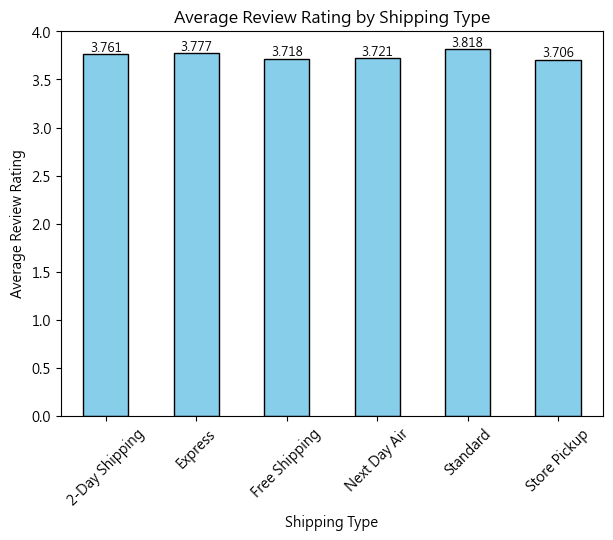

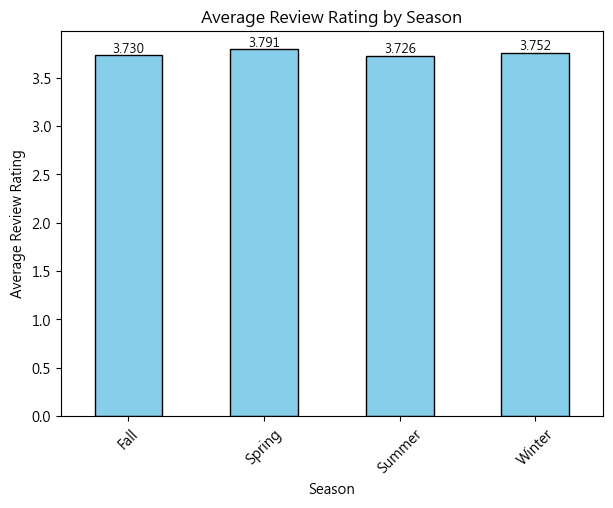

C:\Users\USER\AppData\Local\Temp\ipykernel_22752\481591927.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_values = df.groupby(group_col)[target_col].mean()


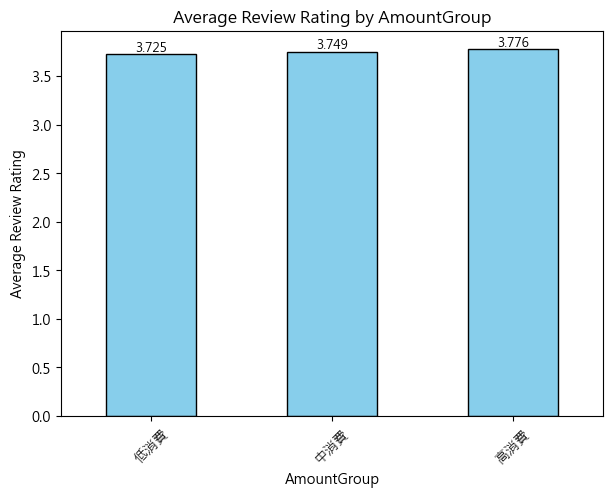

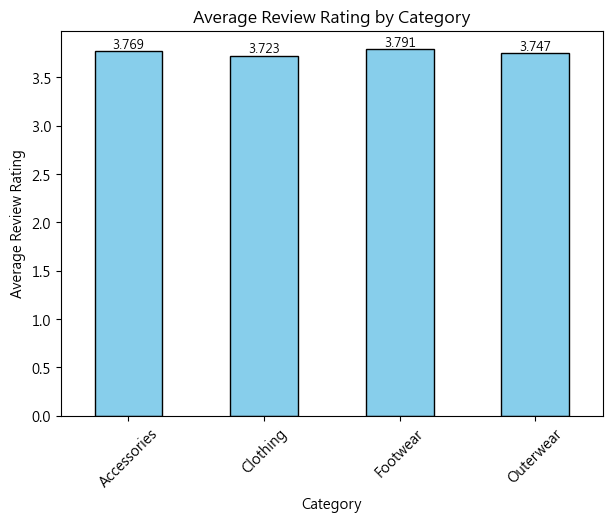

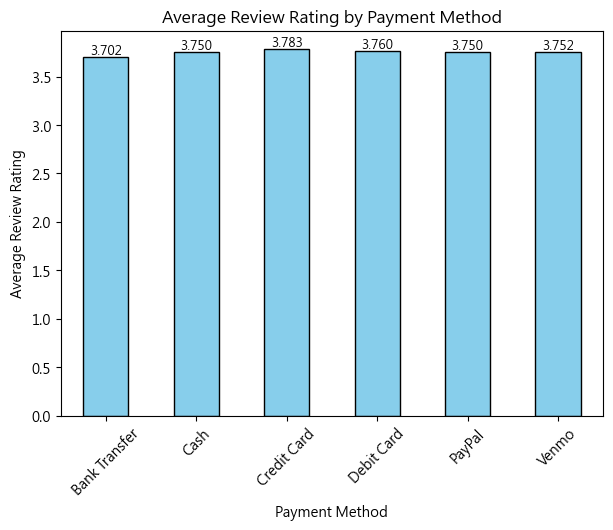

In [85]:
import matplotlib.pyplot as plt

def plot_grouped_bar(df, group_col, target_col="Review Rating"):
    """
    畫出分組平均的直條圖
    """
    avg_values = df.groupby(group_col)[target_col].mean()

    ax=avg_values.plot(kind="bar", figsize=(7,5), color="skyblue", edgecolor="black")

     # 在每個柱子上加數字標籤
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.3f}",   # 顯示到小數點三位
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center", va="bottom", fontsize=9, color="black"
        )

    plt.title(f"Average {target_col} by {group_col}")
    plt.xlabel(group_col)
    plt.ylabel(f"Average {target_col}")
    plt.xticks(rotation=45)
    plt.show()


# 呼叫
plot_grouped_bar(df_eda, "Shipping Type")
plot_grouped_bar(df_eda, "Season")
plot_grouped_bar(df_eda, "AmountGroup")
plot_grouped_bar(df_eda, "Category")
plot_grouped_bar(df_eda, "Payment Method")


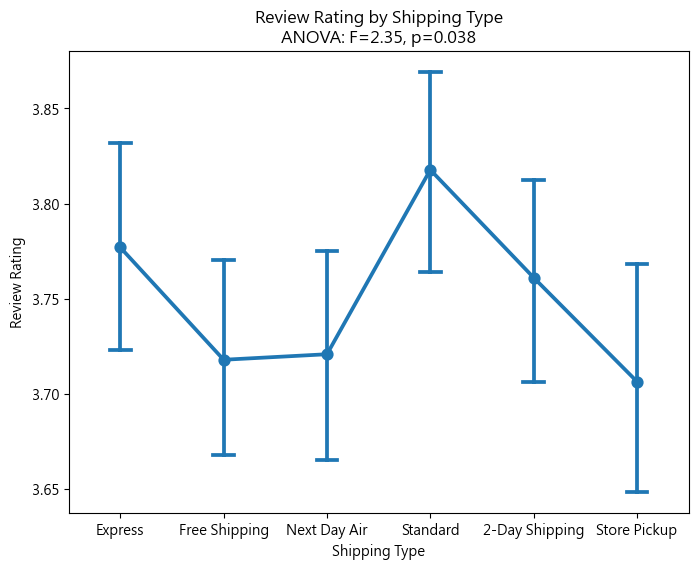

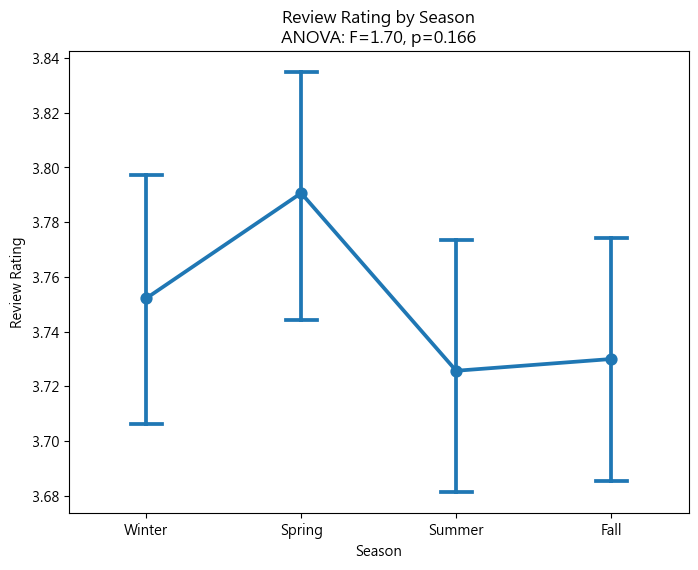

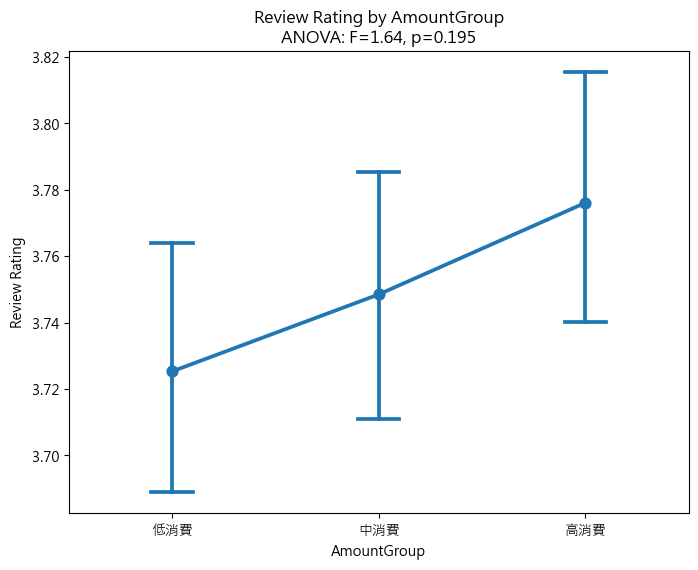

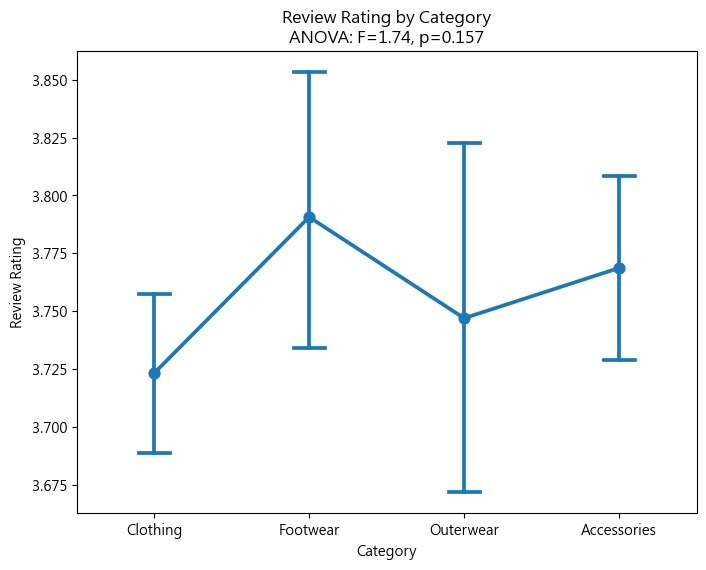

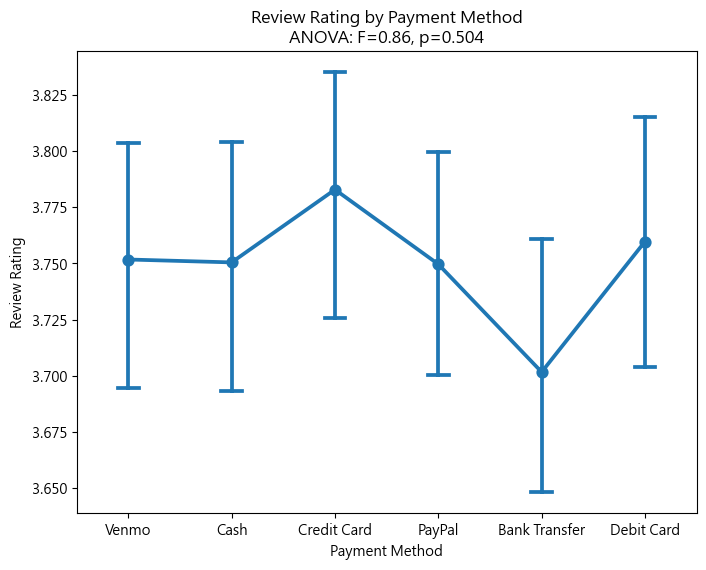

(np.float64(0.8649186292534294), np.float64(0.5037905569911245))

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def anova_pointplot(df, group_col, target_col="Review Rating"):
    """
    對 group_col 做單因子 ANOVA，並畫出平均數 + 95% 信賴區間的 Point Plot
    
    df : DataFrame
    group_col : 分組欄位名稱 (字串)
    target_col : 目標欄位名稱，預設為 "Review Rating"
    """
    # 分組資料
    groups = [df.loc[df[group_col] == g, target_col] for g in df[group_col].unique()]
    
    # ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    # 畫圖
    plt.figure(figsize=(8,6))
    sns.pointplot(x=group_col, y=target_col, data=df, capsize=.2, errorbar="ci")
    plt.title(f"{target_col} by {group_col}\nANOVA: F={f_stat:.2f}, p={p_value:.3f}")
    plt.show()
    
    return f_stat, p_value


anova_pointplot(df_eda, "Shipping Type")
anova_pointplot(df_eda, "Season")
anova_pointplot(df_eda, "AmountGroup")
anova_pointplot(df_eda, "Category")
anova_pointplot(df_eda, "Payment Method")


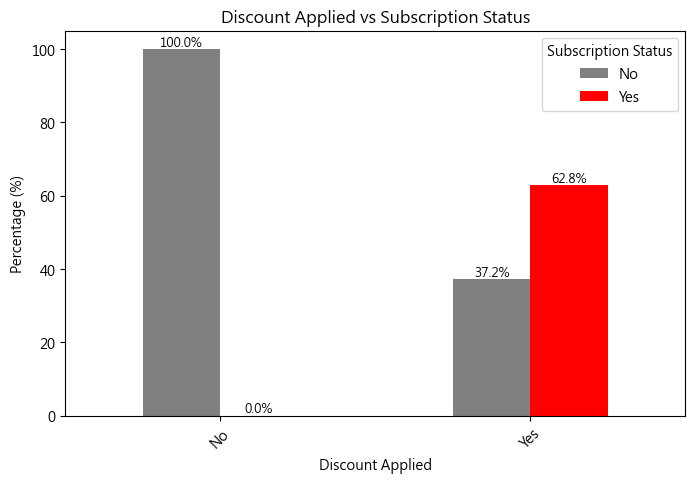

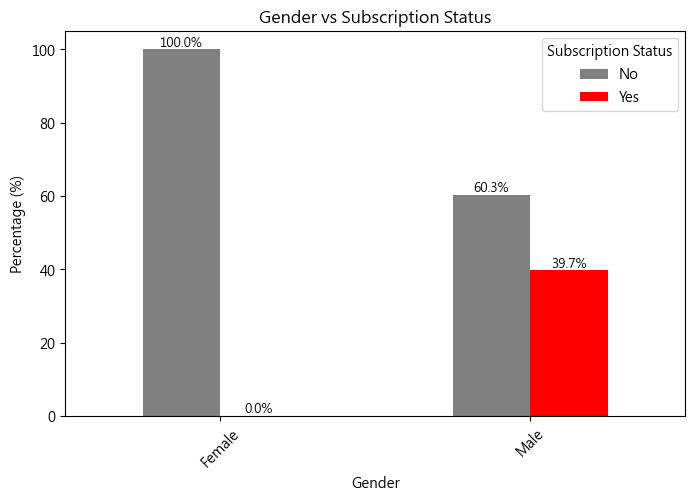

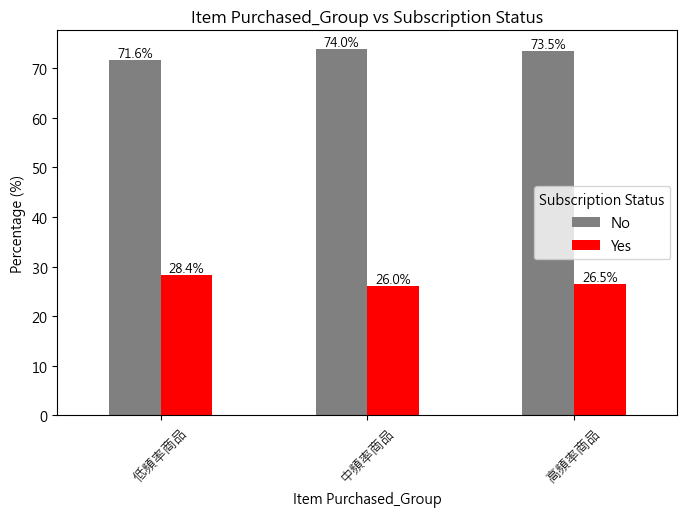

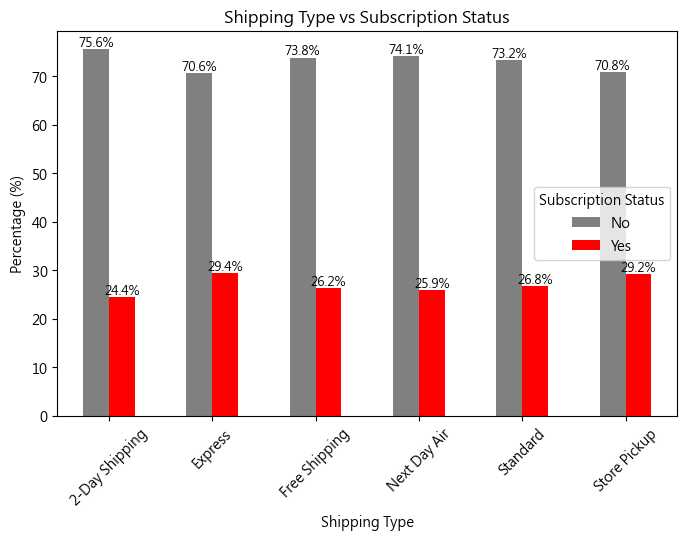

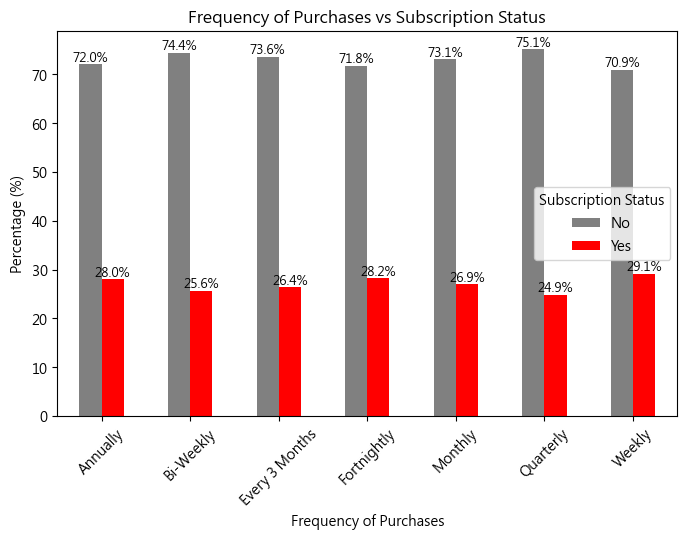

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_crosstab_bar(df, row_var, col_var, normalize="index", color_map=None):
    """
    df        : DataFrame
    row_var   : 列聯表的列 (例如 'Gender', 'Discount Applied')
    col_var   : 列聯表的欄 (例如 'Subscription Status')
    normalize : 預設 'index'，代表橫向百分比
    color_map : dict, 例如 {"No": "gray", "Yes": "red"}
    """
    ct = pd.crosstab(df[row_var], df[col_var], normalize=normalize) * 100
    
    if color_map:
        colors = [color_map.get(col, "blue") for col in ct.columns]  # 預設藍色避免出錯
    else:
        colors = None

    ax = ct.plot(kind="bar", figsize=(8,5), color=colors)

    # 標題與標籤
    plt.title(f"{row_var} vs {col_var}")
    plt.ylabel("Percentage (%)")
    plt.xlabel(row_var)
    plt.legend(title=col_var)
    plt.xticks(rotation=45)

    # 在 bar 上標上百分比數字
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=9)

    plt.show()


# 固定顏色：No = 灰色, Yes = 紅色
custom_colors = {"No": "gray", "Yes": "red"}

plot_crosstab_bar(df_eda, "Discount Applied", "Subscription Status", color_map=custom_colors)
plot_crosstab_bar(df_eda, "Gender", "Subscription Status", color_map=custom_colors)
plot_crosstab_bar(df_eda, "Item Purchased_Group", "Subscription Status", color_map=custom_colors)
plot_crosstab_bar(df_eda, "Shipping Type", "Subscription Status", color_map=custom_colors)
plot_crosstab_bar(df_eda, "Frequency of Purchases", "Subscription Status", color_map=custom_colors)


Chi-square 統計量: 1908.9213651509538
p-value: 0.0
自由度: 1
期望值表:
[[1622.79  600.21]
 [1224.21  452.79]]



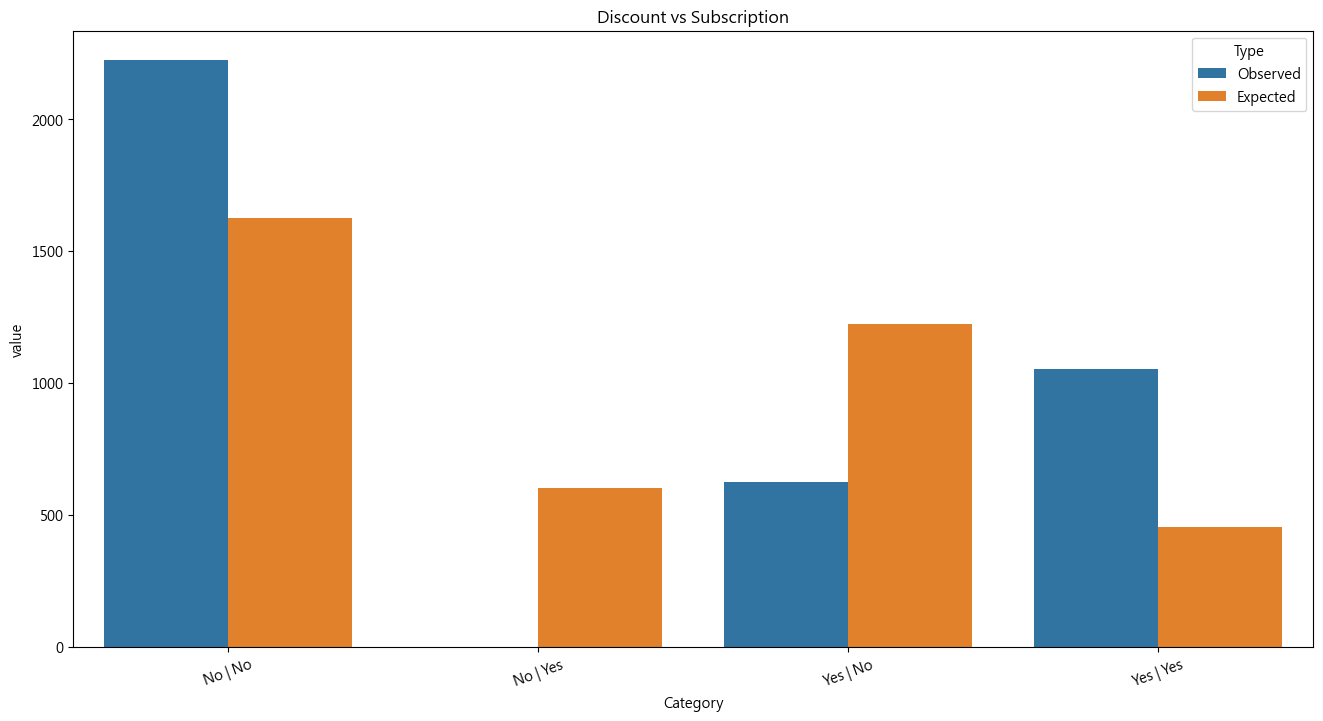

Chi-square 統計量: 676.7944035612919
p-value: 3.3268630006040623e-149
自由度: 1
期望值表:
[[ 911.04  336.96]
 [1935.96  716.04]]



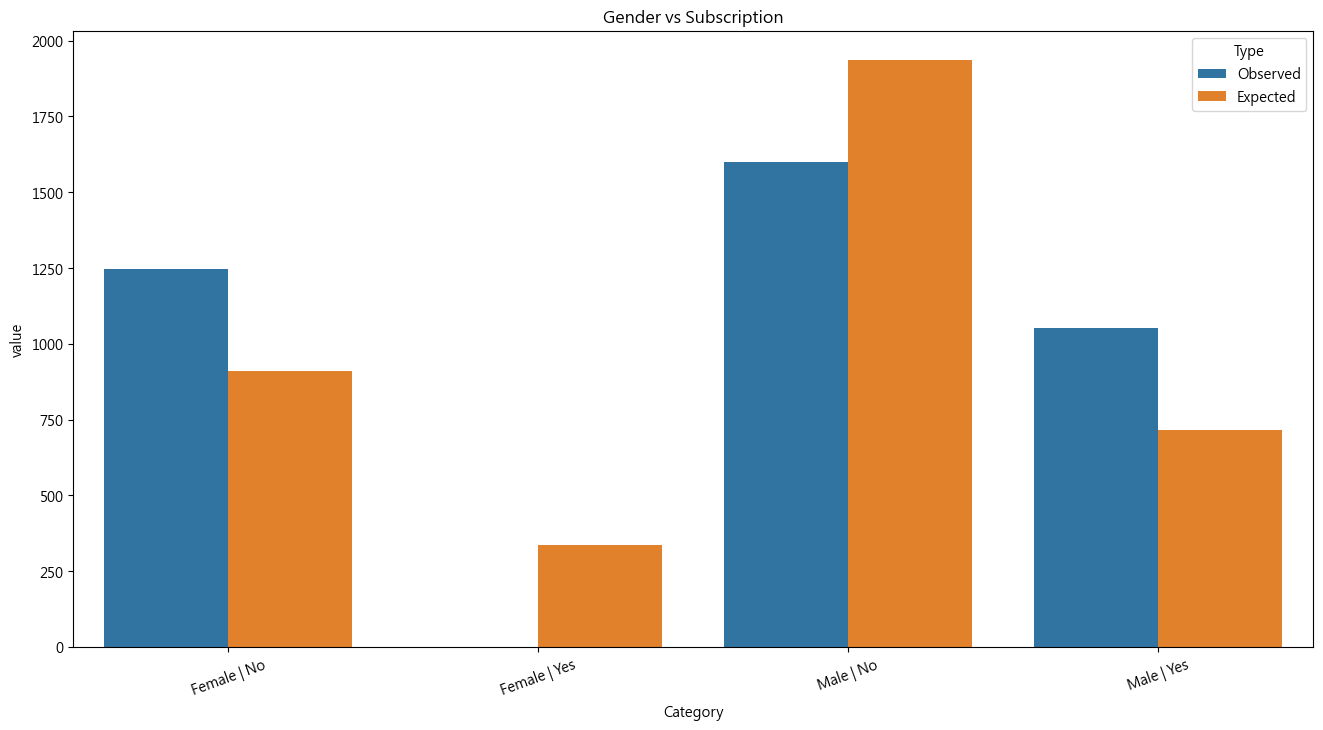

Chi-square 統計量: 1.9197827491311759
p-value: 0.38293448014023557
自由度: 2
期望值表:
[[ 946.81  350.19]
 [ 689.85  255.15]
 [1210.34  447.66]]



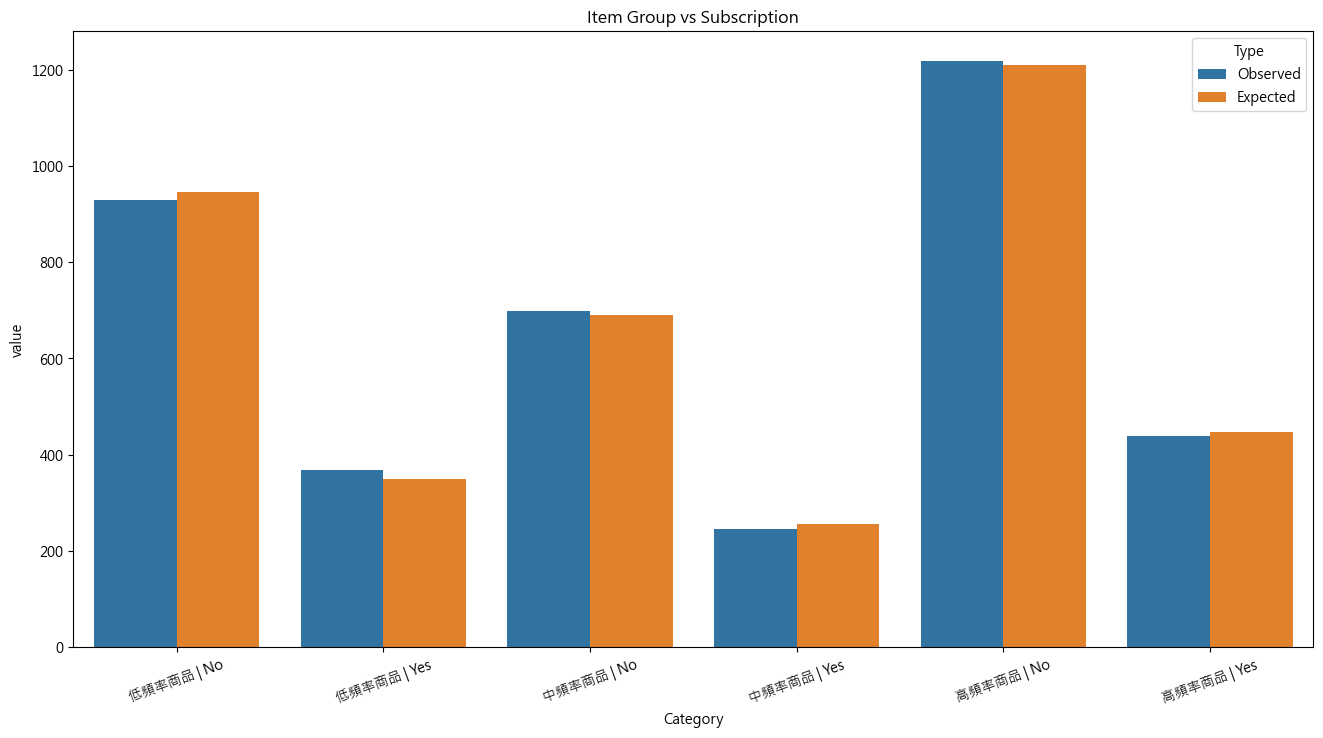

Chi-square 統計量: 6.300602351974799
p-value: 0.27805797565678847
自由度: 5
期望值表:
[[457.71 169.29]
 [471.58 174.42]
 [492.75 182.25]
 [473.04 174.96]
 [477.42 176.58]
 [474.5  175.5 ]]



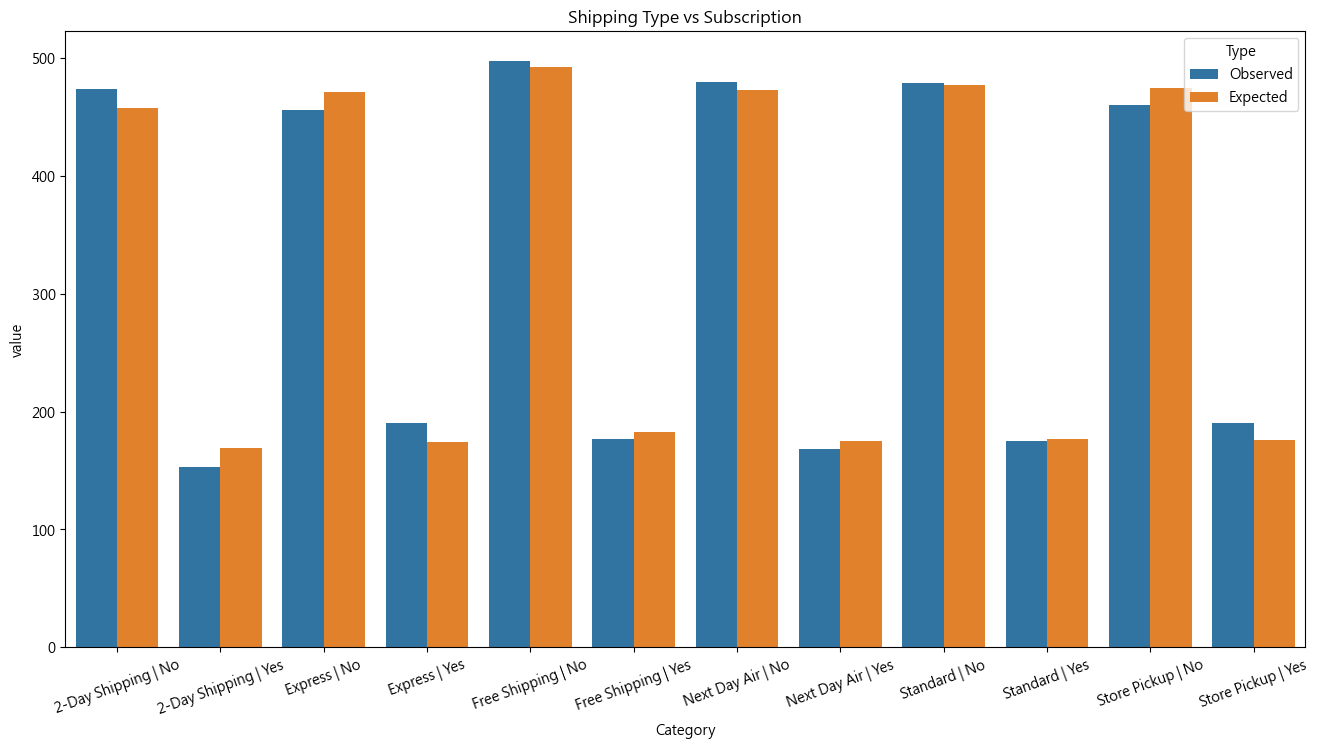

Chi-square 統計量: 3.8946563289521987
p-value: 0.6909297922870219
自由度: 6
期望值表:
[[417.56 154.44]
 [399.31 147.69]
 [426.32 157.68]
 [395.66 146.34]
 [403.69 149.31]
 [410.99 152.01]
 [393.47 145.53]]



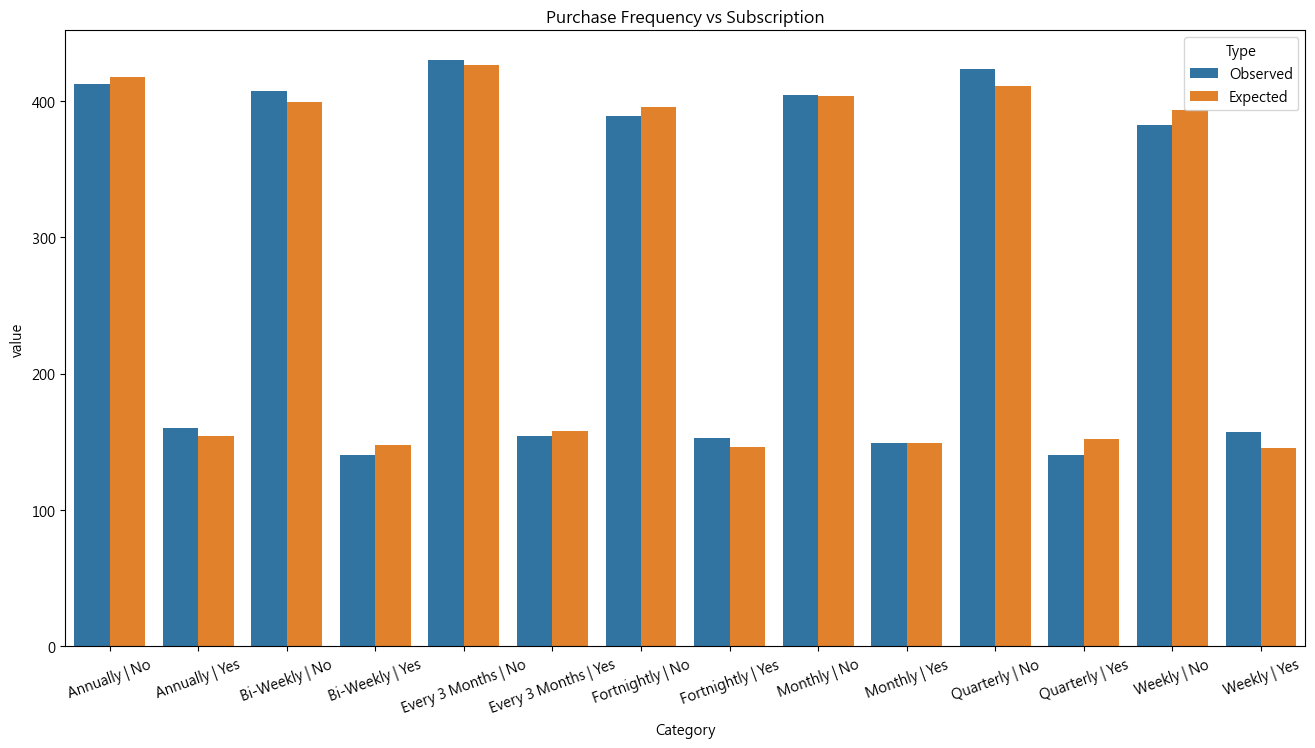

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def chi2_viz(ct_table, title="Chi-square Test Visualization"):
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(ct_table)
    
    # 輸出檢定結果
    print(f"Chi-square 統計量: {chi2}")
    print(f"p-value: {p}")
    print(f"自由度: {dof}")
    print(f"期望值表:\n{expected}\n")
    
    # 整理觀察值 & 期望值
    observed = ct_table.values.flatten()
    expected = expected.flatten()
    
    labels = [f"{i} | {j}" for i in ct_table.index for j in ct_table.columns]
    
    df_plot = pd.DataFrame({
        "Category": labels,
        "Observed": observed,
        "Expected": expected
    })
    
    df_plot_melt = df_plot.melt(id_vars="Category", 
                                value_vars=["Observed","Expected"], 
                                var_name="Type")
    
    # 繪圖
    plt.figure(figsize=(16,8))
    sns.barplot(data=df_plot_melt, x="Category", y="value", hue="Type")
    plt.title(title)
    plt.xticks(rotation=20)
    plt.show()

# 使用範：
ct_discount = pd.crosstab(df_eda["Discount Applied"], df_eda["Subscription Status"])
chi2_viz(ct_discount, title="Discount vs Subscription")

ct_gender = pd.crosstab(df_eda["Gender"], df_eda["Subscription Status"])
chi2_viz(ct_gender, title="Gender vs Subscription")

ct_item = pd.crosstab(df_eda["Item Purchased_Group"], df_eda["Subscription Status"])
chi2_viz(ct_item, title="Item Group vs Subscription")

ct_shipping = pd.crosstab(df_eda["Shipping Type"], df_eda["Subscription Status"])
chi2_viz(ct_shipping, title="Shipping Type vs Subscription")

ct_freq = pd.crosstab(df_eda["Frequency of Purchases"], df_eda["Subscription Status"])
chi2_viz(ct_freq, title="Purchase Frequency vs Subscription")


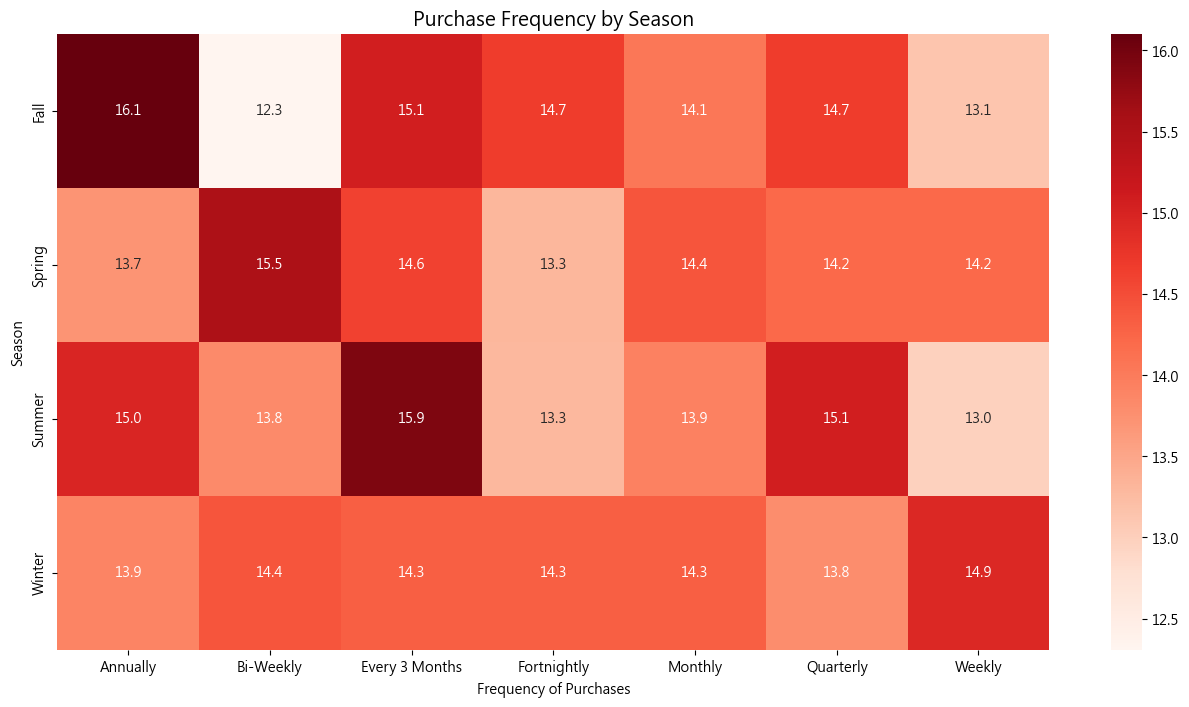

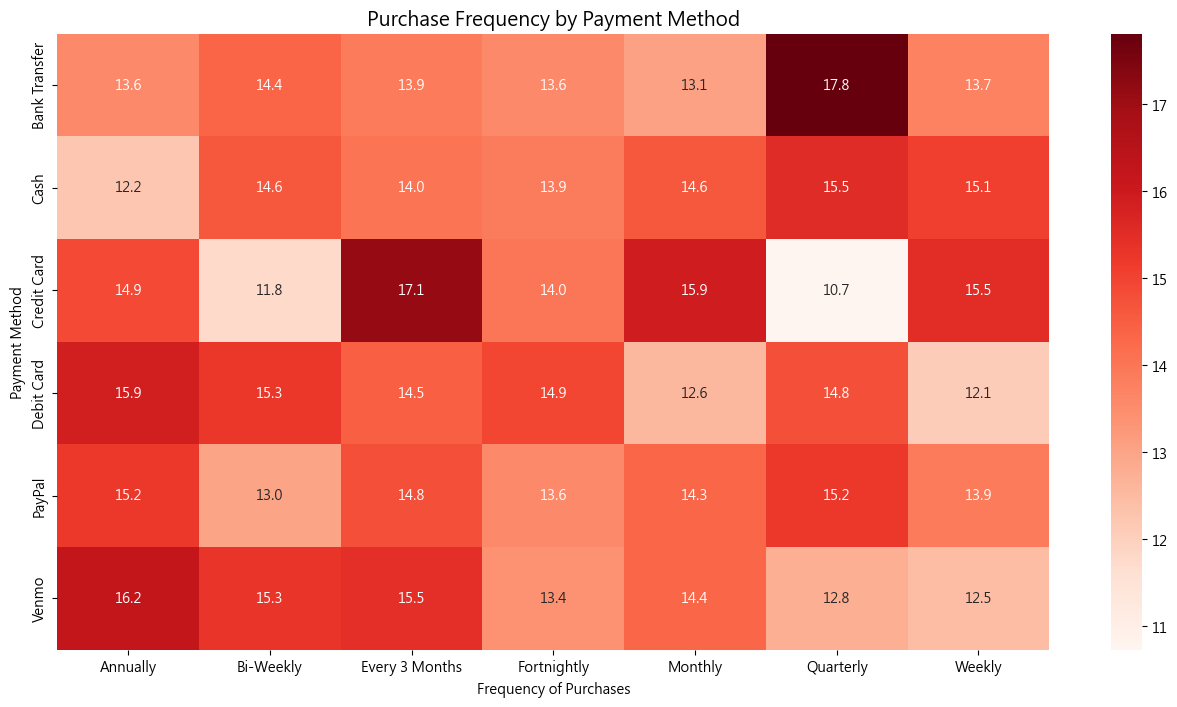

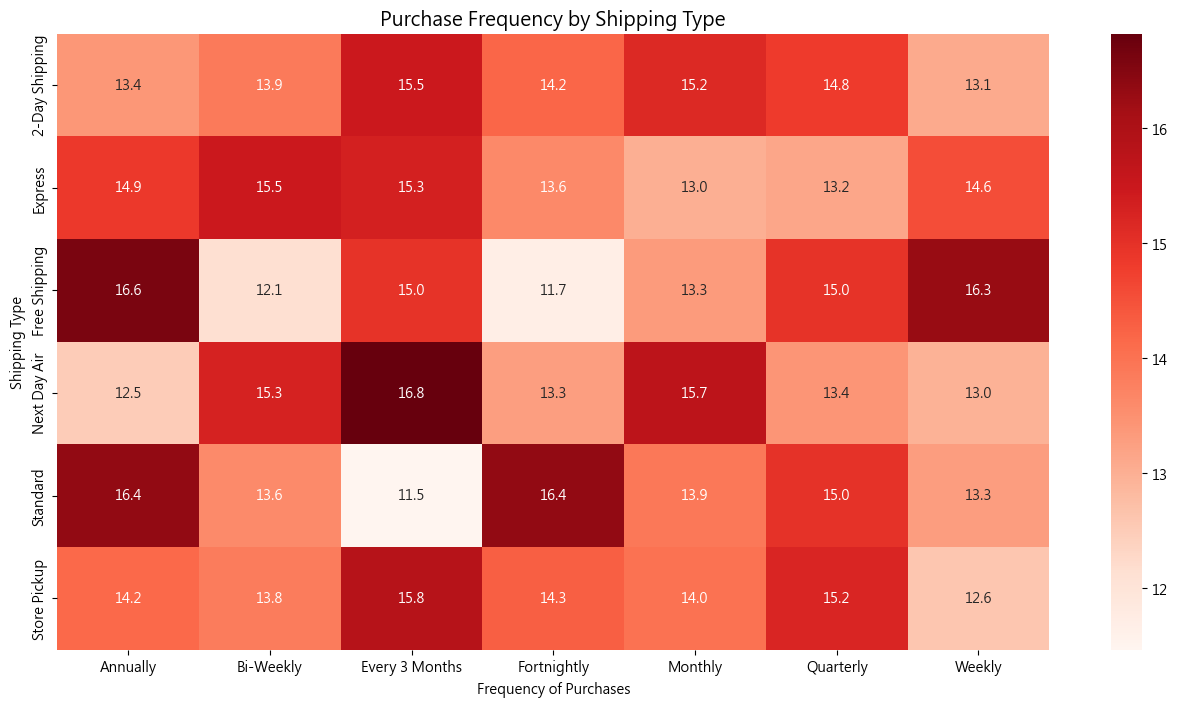

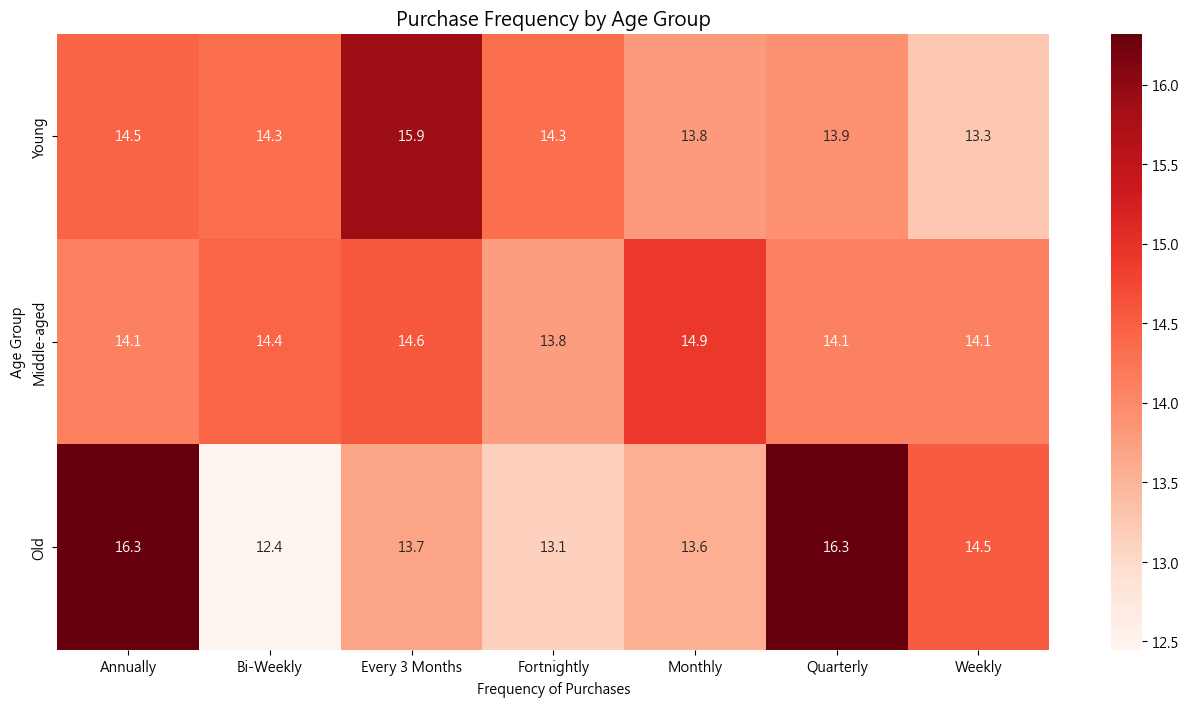

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(ct, title="Heatmap", figsize=(16,8), cmap="Reds"):
    """
    通用列聯表熱力圖繪製函式
    ct: pd.DataFrame (由 pd.crosstab 計算而來，已經標準化或未標準化皆可)
    title: 圖片標題
    figsize: 畫布大小
    cmap: 色彩樣式 (可改為 "Blues", "Greens", "coolwarm" 等)
    """
    plt.figure(figsize=figsize)
    sns.heatmap(ct, annot=True, fmt=".1f", cmap=cmap, cbar=True)
    plt.title(title, fontsize=14)
    plt.ylabel(ct.index.name if ct.index.name else "")
    plt.xlabel(ct.columns.name if ct.columns.name else "")
    plt.show()


# Season × Frequency of Purchases
ct_season = pd.crosstab(df_eda["Season"], df_eda["Frequency of Purchases"], normalize="index")*100
plot_heatmap(ct_season, title="Purchase Frequency by Season")

# Payment Method × Frequency of Purchases
ct_payment = pd.crosstab(df_eda["Payment Method"], df_eda["Frequency of Purchases"], normalize="index")*100
plot_heatmap(ct_payment, title="Purchase Frequency by Payment Method")

# Shipping Type × Frequency of Purchases
ct_shipping = pd.crosstab(df_eda["Shipping Type"], df_eda["Frequency of Purchases"], normalize="index")*100
plot_heatmap(ct_shipping, title="Purchase Frequency by Shipping Type")

# Age Group × Frequency of Purchases
ct_age = pd.crosstab(df_eda["Age Group"], df_eda["Frequency of Purchases"], normalize="index")*100
plot_heatmap(ct_age, title="Purchase Frequency by Age Group")


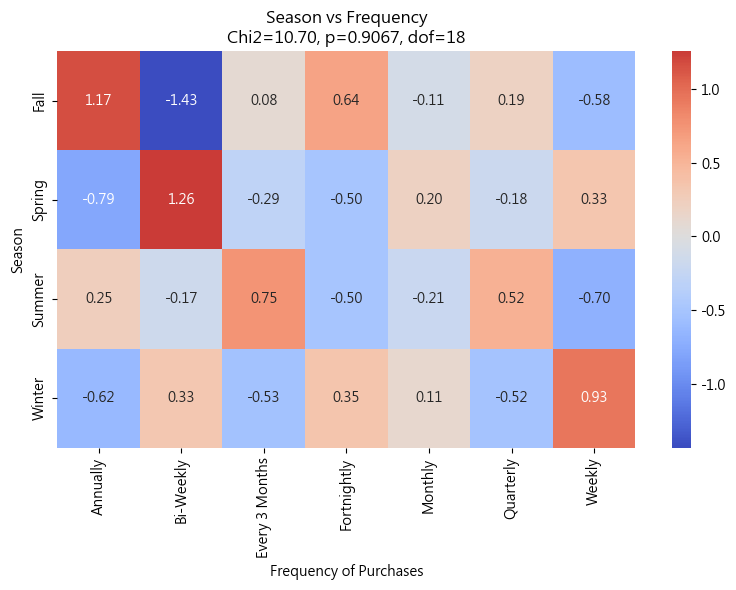

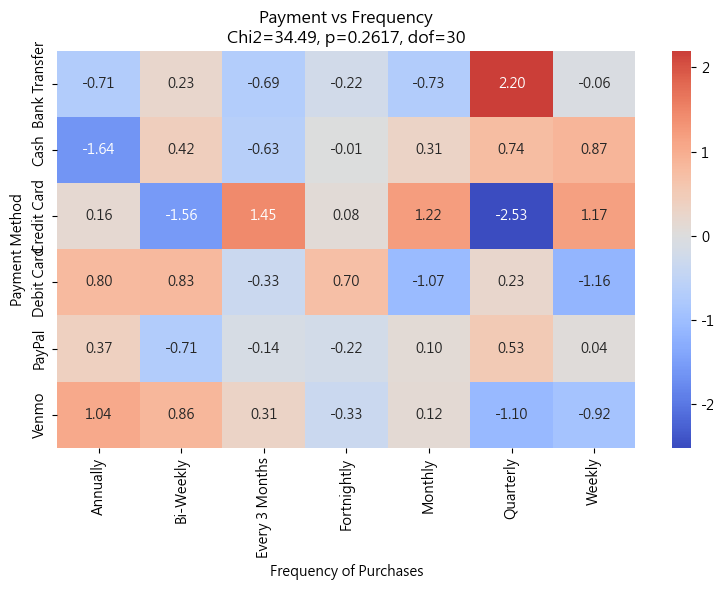

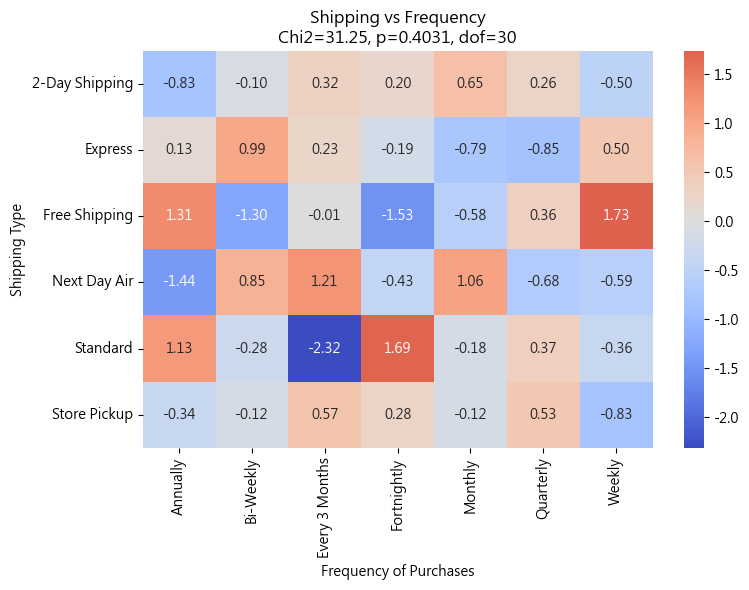

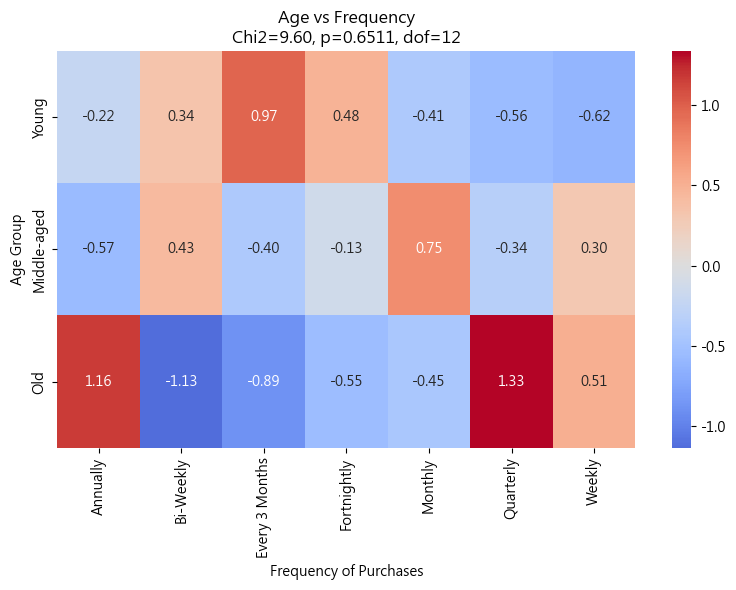

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def plot_residual_heatmap(ct_table, title=""):
    """
    畫出列聯表的標準化殘差熱力圖
    
    參數:
        ct_table : pd.DataFrame (由 pd.crosstab 建立的表格)
        title    : str, 圖表標題 (可選)
    """
    # 卡方檢定
    chi2, p, dof, expected = chi2_contingency(ct_table)
    residuals = (ct_table - expected) / (expected**0.5)

    # 畫熱力圖
    plt.figure(figsize=(8, 6))
    sns.heatmap(residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                xticklabels=ct_table.columns, yticklabels=ct_table.index)

    plt.title(f"{title}\nChi2={chi2:.2f}, p={p:.4f}, dof={dof}", fontsize=12)
    plt.xlabel(ct_table.columns.name)
    plt.ylabel(ct_table.index.name)
    plt.tight_layout()
    plt.show()


# Season × Frequency
ct_season = pd.crosstab(df_eda["Season"], df_eda["Frequency of Purchases"])
plot_residual_heatmap(ct_season, title="Season vs Frequency")

# Payment × Frequency
ct_payment = pd.crosstab(df_eda["Payment Method"], df_eda["Frequency of Purchases"])
plot_residual_heatmap(ct_payment, title="Payment vs Frequency")

# Shipping × Frequency
ct_shipping = pd.crosstab(df_eda["Shipping Type"], df_eda["Frequency of Purchases"])
plot_residual_heatmap(ct_shipping, title="Shipping vs Frequency")

# Age × Frequency
ct_age = pd.crosstab(df_eda["Age Group"], df_eda["Frequency of Purchases"])
plot_residual_heatmap(ct_age, title="Age vs Frequency")


In [91]:
#移除共線特徵
df_calculate=df_calculate.drop(['Promo Code Used'], axis=1)


X_linear = df_calculate.drop(['Review Rating'], axis=1)

y_linear = df_calculate['Review Rating']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_linear = scaler.fit_transform(X_linear)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5481852315933501
R-squared: -0.00536385006701301


In [92]:
X_tree_regressor = df_calculate.drop(['Review Rating'], axis=1)

y_tree_regressor = df_calculate['Review Rating']

from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_tree_regressor, y_tree_regressor, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_r, y_train_r)

y_pred_r = rf_model.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5558471205128205
R-squared: -0.019415644422134726


In [93]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_r, y_train_r)

y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test_r, y_pred_xgb)
r2 = r2_score(y_test_r, y_pred_xgb)

print(f"Mean Squared Error: {mse}") 
print(f"R-squared: {r2}")

Mean Squared Error: 0.765446823830211
R-squared: -0.40381849323217467


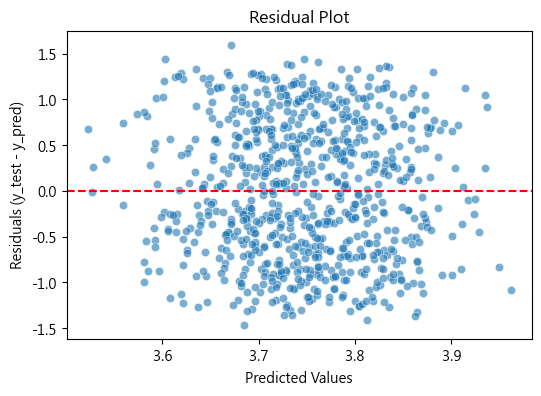

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


residuals = y_test_r - y_pred_r

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


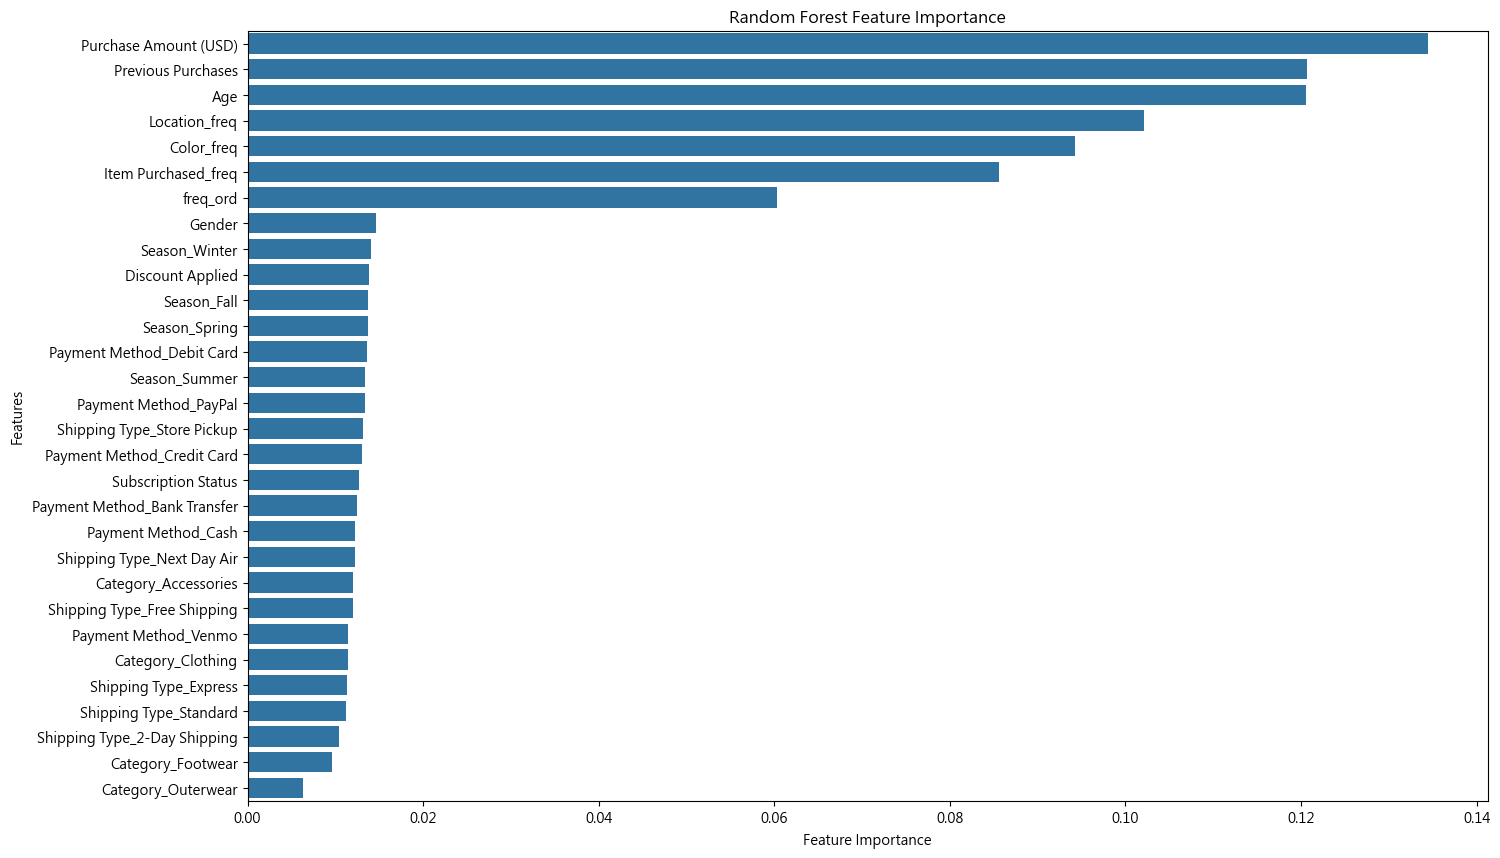

In [96]:
import pandas as pd
import numpy as np


importances = rf_model.feature_importances_
features = X_train_r.columns

# 排序
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16,10))
sns.barplot(x=importances[indices], y=features[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


In [97]:
from sklearn.pipeline import Pipeline
X_linear_2= df_calculate.drop(['Subscription Status'], axis=1)

y_linear_2 = df_calculate['Subscription Status']

from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_linear_2, y_linear_2, test_size=0.2, stratify=y_linear_2, random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

logistic_model = pipe.fit(X_train_2, y_train_2)

y_pred_2 = logistic_model.predict(X_test_2)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score',accuracy_score(y_test_2,y_pred_2))
print('\nconfusion_matrix\n',confusion_matrix(y_test_2,y_pred_2))
print('\nclassification_report\n',classification_report(y_test_2,y_pred_2))

accuracy_score 0.8576923076923076

confusion_matrix
 [[467 102]
 [  9 202]]

classification_report
               precision    recall  f1-score   support

         0.0       0.98      0.82      0.89       569
         1.0       0.66      0.96      0.78       211

    accuracy                           0.86       780
   macro avg       0.82      0.89      0.84       780
weighted avg       0.90      0.86      0.86       780



In [98]:
X_tree= df_calculate.drop(['Subscription Status'], axis=1)

y_tree = df_calculate['Subscription Status']

from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tree, y_tree, test_size=0.2,stratify=y_tree, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_t, y_train_t)

y_pred_t = rf_model.predict(X_test_t)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score',accuracy_score(y_test_t,y_pred_t))
print('\nconfusion_matrix\n',confusion_matrix(y_test_t,y_pred_t))
print('\nclassification_report\n',classification_report(y_test_t,y_pred_t))

accuracy_score 0.8269230769230769

confusion_matrix
 [[488  81]
 [ 54 157]]

classification_report
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       569
         1.0       0.66      0.74      0.70       211

    accuracy                           0.83       780
   macro avg       0.78      0.80      0.79       780
weighted avg       0.84      0.83      0.83       780



In [99]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_t, y_train_t)

y_pred_xgb = xgb_model.predict(X_test_t)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('accuracy_score',accuracy_score(y_test_t,y_pred_xgb))
print('\nconfusion_matrix\n',confusion_matrix(y_test_t,y_pred_xgb))
print('\nclassification_report\n',classification_report(y_test_t,y_pred_xgb))

accuracy_score 0.8025641025641026

confusion_matrix
 [[482  87]
 [ 67 144]]

classification_report
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       569
         1.0       0.62      0.68      0.65       211

    accuracy                           0.80       780
   macro avg       0.75      0.76      0.76       780
weighted avg       0.81      0.80      0.81       780



In [100]:
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold

rf=RandomForestClassifier(
    class_weight='balanced',random_state=42,n_jobs=-1)

rf_grid = {
    "n_estimators": [300, 500, 800],
    "max_depth": [None, 8, 12, 16, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ["sqrt", 0.3, 0.5, 0.8],
    "bootstrap": [True]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_search = RandomizedSearchCV(
    rf, rf_grid, n_iter=40, scoring="roc_auc", cv=cv, n_jobs=-1, random_state=42
)
rf_search.fit(X_train_t, y_train_t)
print("RF best AUC (CV):", rf_search.best_score_)
rf_best = rf_search.best_estimator_

RF best AUC (CV): 0.8989495035571025


In [101]:
neg = (y_train_t == 0).sum(); pos = (y_train_t == 1).sum()

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    nthread=-1,
    random_state=42,
    scale_pos_weight=neg/pos   # 重要：類別不平衡
)

xgb_grid = {
    "n_estimators": [400, 700, 1000],
    "learning_rate": [0.02, 0.05, 0.1],
    "max_depth": [3, 4, 6],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "reg_lambda": [0, 1, 2, 5],
    "min_child_weight": [1, 2, 5]
}

xgb_search = RandomizedSearchCV(
    xgb, xgb_grid, n_iter=40, scoring="roc_auc", cv=cv, n_jobs=-1, random_state=42
)
xgb_search.fit(X_train_t, y_train_t)
print("XGB best AUC (CV):", xgb_search.best_score_)
xgb_best = xgb_search.best_estimator_

XGB best AUC (CV): 0.8965872825745139


In [102]:
from sklearn.model_selection import cross_val_score
pipe_lr = Pipeline([("scaler", StandardScaler()),
                    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_lr  = cross_val_score(pipe_lr, X_train_2, y_train_2, cv=cv, scoring="roc_auc")
pr_lr   = cross_val_score(pipe_lr, X_train_2, y_train_2, cv=cv, scoring="average_precision")
print(auc_lr.mean(), auc_lr.std(), pr_lr.mean(), pr_lr.std())

0.8905145300000875 0.004689685299323866 0.6377097801654306 0.01822431608491639


In [103]:
# 1) 同一個 CV 下比較三模型的 ROC-AUC & PR-AUC
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_report(name, est, X, y):
    auc = cross_val_score(est, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
    pr  = cross_val_score(est, X, y, cv=cv, scoring="average_precision", n_jobs=-1)
    print(f"{name} | ROC-AUC {auc.mean():.4f}±{auc.std():.4f}  PR-AUC {pr.mean():.4f}±{pr.std():.4f}")

cv_report("LogReg", pipe_lr, X_train_2, y_train_2)   # 你的 LR pipeline
cv_report("RF(best)", rf_best, X_train_t, y_train_t)
cv_report("XGB(best)", xgb_best, X_train_t, y_train_t)



LogReg | ROC-AUC 0.8905±0.0047  PR-AUC 0.6377±0.0182
RF(best) | ROC-AUC 0.8989±0.0088  PR-AUC 0.6576±0.0251
XGB(best) | ROC-AUC 0.8966±0.0069  PR-AUC 0.6475±0.0305


In [104]:
print(rf_search.best_params_)

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [105]:
from sklearn.model_selection import GridSearchCV
gs=RandomForestClassifier(
    class_weight='balanced',random_state=42,n_jobs=-1
)
gs_grid = {
    "n_estimators": [700,800,900],
    "max_depth": [18,20,22],
    "min_samples_split": [3,5,7],
    "min_samples_leaf": [1,2,3],
    "max_features": ["sqrt"],
    "bootstrap": [True]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs_search = GridSearchCV(
    gs, gs_grid, scoring="roc_auc", cv=cv, n_jobs=-1,
)
gs_search.fit(X_train_t, y_train_t)
print("RF best AUC (CV):", gs_search.best_score_)
gs_best = gs_search.best_estimator_
print(gs_search.best_params_)   


RF best AUC (CV): 0.8997399095808859
{'bootstrap': True, 'max_depth': 22, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 700}


In [116]:
gs=RandomForestClassifier(
    class_weight='balanced',random_state=42,n_jobs=-1
)
gs_grid = {
    "n_estimators": [550,600,650,700,750],
    "max_depth": [21,22,23,24,25],
    "min_samples_split": [6,7,8],
    "min_samples_leaf": [2],
    "max_features": ["sqrt"],
    "bootstrap": [True]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs_search = GridSearchCV(
    gs, gs_grid, scoring="roc_auc", cv=cv, n_jobs=-1,
)
gs_search.fit(X_train_t, y_train_t)
print("RF best AUC (CV):", gs_search.best_score_)
gs_best = gs_search.best_estimator_
print(gs_search.best_params_)   

RF best AUC (CV): 0.9001175734150275
{'bootstrap': True, 'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 600}


In [117]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_recall_curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_proba = cross_val_predict(gs_best, X_train_t, y_train_t, cv=cv,
                              method="predict_proba")[:,1]
P, R, T = precision_recall_curve(y_train_t, oof_proba)
F1 = 2*P*R/(P+R+1e-9)
best_thr = T[np.nanargmax(F1)]

gs_best.fit(X_train_t, y_train_t)                 # 全訓練集重訓
proba_test = gs_best.predict_proba(X_test_t)[:,1]
y_pred_best = (proba_test >= best_thr).astype(int)
print("\n=== Threshold tuned ===")
print("Test accuracy:", accuracy_score(y_test_t, y_pred_best))
print("Confusion:\n", confusion_matrix(y_test_t, y_pred_best))
print(classification_report(y_test_t, y_pred_best, digits=3))


=== Threshold tuned ===
Test accuracy: 0.8641025641025641
Confusion:
 [[463 106]
 [  0 211]]
              precision    recall  f1-score   support

         0.0      1.000     0.814     0.897       569
         1.0      0.666     1.000     0.799       211

    accuracy                          0.864       780
   macro avg      0.833     0.907     0.848       780
weighted avg      0.910     0.864     0.871       780



Discount Applied         0.533039
Gender                   0.148607
Previous Purchases       0.036820
Age                      0.036542
Purchase Amount (USD)    0.035520
Review Rating            0.029586
Location_freq            0.028129
Color_freq               0.027875
Item Purchased_freq      0.024100
freq_ord                 0.017688
dtype: float64


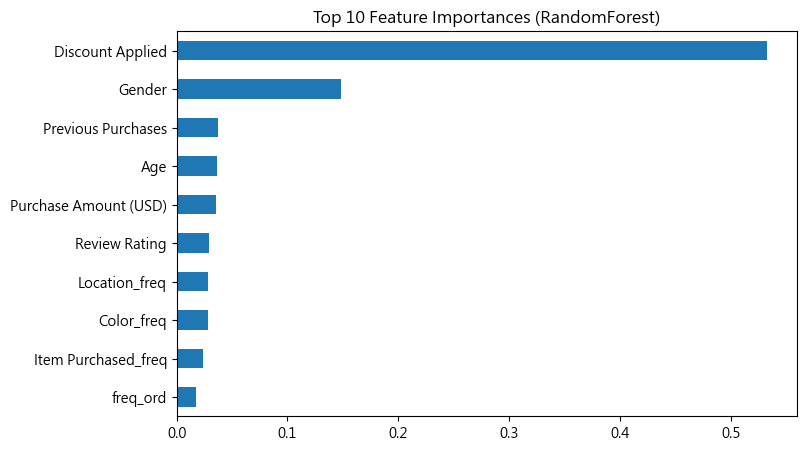

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設你有特徵名稱
feature_names = X_train_t.columns  

# 抓出重要性
importances = gs_best.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 顯示前 10 名
print(feat_imp.head(10))

# 視覺化
plt.figure(figsize=(8,5))
feat_imp.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (RandomForest)")
plt.show()


In [109]:
X_reg=df_calculate.drop(['freq_ord'],axis=1)
y_reg=df_calculate['freq_ord']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, stratify=y_reg, random_state=42)

pipe_reg=Pipeline([
    ("scaler", StandardScaler()),
    ("clf",LogisticRegression (max_iter=1000))
])

pipe_reg.fit(X_train_reg, y_train_reg)
y_pred_reg=pipe_reg.predict(X_test_reg)

print('mean_squared_error',mean_squared_error(y_test_reg,y_pred_reg))
print('R2',r2_score(y_test_reg,y_pred_reg))


mean_squared_error 7.741025641025641
R2 -0.9418353189533077


In [110]:
rf_reg_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg_rf=rf_reg_model.predict(X_test_reg)

print('mean_squared_error',mean_squared_error(y_test_reg,y_pred_reg_rf))
print('R2',r2_score(y_test_reg,y_pred_reg_rf))

mean_squared_error 7.643589743589744
R2 -0.9173935362039782


In [111]:
xgb_reg_model=XGBRegressor(
    n_estimators=100,random_state=42
)
xgb_reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg_xgb=xgb_reg_model.predict(X_test_reg)

print('mean_squared_error',mean_squared_error(y_test_reg,y_pred_reg_xgb))
print('R2',r2_score(y_test_reg,y_pred_reg_xgb))

mean_squared_error 4.7619476318359375
R2 -0.19453394412994385


In [112]:
rf_tree_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_tree_model.fit(X_train_reg, y_train_reg)
y_pred_tree_rf=rf_tree_model.predict(X_test_reg)


print('accuracy_score',accuracy_score(y_test_t,y_pred_tree_rf))
print('\nconfusion_matrix\n',confusion_matrix(y_test_t,y_pred_tree_rf))
print('\nclassification_report\n',classification_report(y_test_t,y_pred_tree_rf))

accuracy_score 0.04871794871794872

confusion_matrix
 [[  0 103  88  99  74  66  80  59]
 [  0  38  35  32  34  25  26  21]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]

classification_report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       569
         1.0       0.27      0.18      0.22       211
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0

    accuracy                           0.05       780
   macro avg       0.03      0.02      0.03       780
weighted avg       0.07      0.05      0.06  

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\m

In [113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_le = le.fit_transform(df_calculate["freq_ord"])  # 字串 -> 0..6
# 可取得對照表
label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X_le = df_calculate.drop(columns=["freq_ord"])  # 別把目標留在特徵裡
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(
    X_le, y_le, test_size=0.2, stratify=y_le, random_state=42
)

xgb = XGBClassifier(objective="multi:softprob", num_class=len(le.classes_),
                    eval_metric="mlogloss", n_estimators=300, random_state=42, tree_method="hist")
xgb.fit(X_train_le, y_train_le)
y_pred_le = xgb.predict(X_test_le)

# 還原成原本文字標籤
y_pred_labels = le.inverse_transform(y_pred_le)

print('accuracy_score',accuracy_score(y_test_le,y_pred_le))
print(confusion_matrix(y_test_le, y_pred_le))
print(classification_report(y_test_le, y_pred_le, digits=3))

accuracy_score 0.13205128205128205
[[12 18 18 14 21 13 18]
 [21 22 10 19 17 14 10]
 [21 18 14 19 11 18 16]
 [17 12 14 11 19 19 19]
 [17 15 14 20 15 17 10]
 [11 17 20 20 17 10 14]
 [17 15 12 20 11 14 19]]
              precision    recall  f1-score   support

           0      0.103     0.105     0.104       114
           1      0.188     0.195     0.191       113
           2      0.137     0.120     0.128       117
           3      0.089     0.099     0.094       111
           4      0.135     0.139     0.137       108
           5      0.095     0.092     0.093       109
           6      0.179     0.176     0.178       108

    accuracy                          0.132       780
   macro avg      0.133     0.132     0.132       780
weighted avg      0.133     0.132     0.132       780



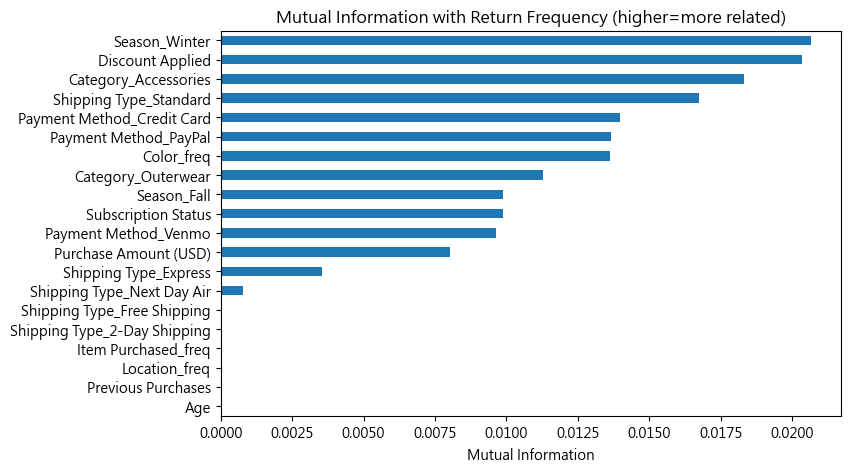

In [114]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# 若你知道哪些欄位是類別型，填入 list；否則先全當連續
categorical_cols = []  # 例: ['Gender','Payment Method']
discrete_mask = X_le.columns.isin(categorical_cols)

mi = mutual_info_classif(X_le, y_le, discrete_features=discrete_mask, random_state=42)
mi_s = pd.Series(mi, index=X_le.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
mi_s.head(20).iloc[::-1].plot(kind="barh")
plt.title("Mutual Information with Return Frequency (higher=more related)")
plt.xlabel("Mutual Information")
plt.show()
